# 1. Data Description

- 1.1 해당 데이터 선정 이유
- 1.2 문제제기 방향
- 1.3 분석 목표

---


> ## 1.1 해당 데이터 선정 이유
- 본인이 데이터 분석가로 거듭나기 위한 선상에 놓여있기에, \
  데이터직종의 이직트렌드를 시사하기 적합하단 판단으로 데이터 선정 \
  
> - 대한민국에서의 데이터직군의 역사는 길지 않아 데이터 또한 많지 않았기에, \
데이터 산업의 근간이었던 미국의 데이터를 선정

  







> ## 1.2 문제제기 방향
- 이직성향이 어떤 특성으로 인해 좌우되는지 순위별로 확인

> - 가설1 : 경력년차에 따라 이직희망여부가 차이난다.  
  - IT 직군에서의 이직은 도메인지식을 얻기 전까지는 빈번한 편에 속한다고 하는데,  
수치적으로도 근속연차에 따라 이직률의 차이가 있는지 분석한다.

> - 가설2 : 도시개발지수에 따라 이직희망여부가 차이난다.  
  - IT산업의 경우 신 산업분야중 하나이기에 대한민국의 판교처럼 업무환경이 인프라가 좋은곳인 경우가 많다.
  복지상향을 위해 좋은인프라를 가진 도시로의 이직 희망율과 연관성이 있는지 확인한다.




> ## 1.3 분석 목표
- 데이터 직군 종사자들의 이직성향을 파악하여 예비 데이터직군 종사자들 및 채용을 계획중인 회사에 시사한다.
- 단일특성만으로 판단하기 어려울 수 있으므로, 복합적으로 이직희망여부를 분류하는 모델을 설계한다.
- 동일주제로 진행했던 이전 분석보다 구체적인 결측치처리로 모델의 성능향상을 도모한다.  
(&nbsp;이전분석 결측치 처리 : 단일값으로 imputed  
&nbsp;&nbsp;&nbsp;현재 결측치 처리 방향 : heuristic접근, 상관관계 확인, 머신러닝기반 imputed&nbsp;&nbsp;)





> #### *1) 라이브러리 설치*

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip3 install jinja2==3.0.3
    !pip3 install h5py
    !pip3 install typing-extensions
    !pip3 install wheel
    !pip3 install imgaug==0.2.5
    !pip3 install eli5
    !pip3 install pandas-profiling==2.*
    !pip3 install pandas-profiling --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org
    !pip3 install pdpbox==0.2.0
    !pip3 install shap
    !apt -qq -y install fonts-nanum > /dev/null
    !pip3 install impyute
    !pip3 install missingpy

> #### *2) 모듈 불러오기 / 사용할 함수 선언*

In [1]:
#@title
import sys
import os

# To DataFrame
import pandas as pd
import numpy as np

# To Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.lines as lines
from matplotlib.ticker import MaxNLocator
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
plt.rc('font', family='NanumBarunGothic')
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
from pandas_profiling import ProfileReport
from pdpbox import pdp
import shap
import eli5
from eli5.sklearn import PermutationImportance
from itertools import cycle
from sklearn.tree import export_graphviz
import graphviz

# To Preprocessing
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import *
import collections
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# To Encoding
from sklearn.preprocessing import LabelEncoder

# To Mechine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay


# 2. Data Exploration

- 2.1 Import Data from GoogleDrive
- 2.2 Introduce Column
- 2.3 Data Profiling(사전확인)

> ## 2.1 Import Data from GoogleDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_raw = pd.read_csv('/content/drive/MyDrive/HR Analytics/HR_Analytics_DataJob_Search.csv', index_col = 0)
# https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [4]:
df = df_raw.copy()
df=df[['enrollee_id', 'gender', 'education_level', 'major_discipline',
       'training_hours', 'relevent_experience', 'experience', 'last_new_job',
       'city', 'city_development_index', 'company_type', 'company_size', 'target']]
df.head(10)

enrollee_id  gender education_level major_discipline  training_hours  \
0         7041    Male        Graduate       Humanities              65   
1        29117     NaN        Graduate             STEM              12   
2        30937  Female        Graduate             STEM              83   
3        25290     NaN     High School              NaN              29   
4        10481     NaN        Graduate  Business Degree             214   
5        24226  Female        Graduate             STEM              13   
6        17783    Male        Graduate             STEM              11   
7        17941     NaN         Masters  Business Degree              18   
8        20653    Male        Graduate             STEM              44   
9        15297     NaN             NaN              NaN              34   

       relevent_experience experience last_new_job      city  \
0  Has relevent experience         <1            1   city_40   
1   No relevent experience         <1        Never   city_11   
2   No relevent experience         <1            2   city_57   
3  Has relevent experience         <1            1  city_173   
4   No relevent experience         <1        Never  city_102   
5  Has relevent experience         <1            1   city_21   
6  Has relevent experience         <1            2   city_65   
7   No relevent experience         <1            1   city_21   
8   No relevent experience         <1            1   city_16   
9   No relevent experience         <1        Never  city_103   

   city_development_index company_type company_size  target  
0                   0.776      Pvt Ltd    1000-4999       0  
1                   0.550          NaN          NaN       0  
2                   0.866      Pvt Ltd        10/49       0  
3                   0.878      Pvt Ltd      100-500       0  
4                   0.804          NaN          NaN       0  
5                   0.624      Pvt Ltd        50-99       0  
6                   0.802      Pvt Ltd       10000+       0  
7                   0.624      Pvt Ltd       10000+       0  
8                   0.910          NaN          NaN       0  
9                   0.920          NaN          NaN       0

## 2.2 Introduce Column
> ### **Surveyor**
  * **enrollee_id - 설문자 고유번호**<br>
  * **gender - 설문자 성별**<br>
    *('Male',　'Female',　'Other',　nan)*
  * **target - 이직희망여부**<br>
    *('0'_False,　'1'_True)*<br><br>

> ### **Knowledge**
  * **education_level - 학위**<br>
    *('Phd',　'Masters',　'Graduate',　'High School',　'Primary School',　nan )*
  * **major_discipline - 전공**<br>
    *('STEM',　'Business Degree',　'Humanities',　'Arts',　'Other',　'No Major',　nan)*
  * **training_hours - 교육시간**<br>
    *(1~336_Continuous Data)*
  * **relevent_experience - 데이터직군 관련경험**<br>
    *('Has relevent experience',　'No relevent experience')*
  * **experience - 경력년수**<br>
    *(0~21_Continuous Data / nan)*
  * **last_new_job - 이전직장 근속년수**<br>
    *(0~4_Continuous Data / nan)*<br><br>

> ### **City**
  * **city - 도시 고유 번호**<br>
  * **city_development_index - 도시 개발 지수**<br>
    *(0.448~0.949_Continuous Data)*<br><br>

> ### **Company**
  * **company_type - 회사 유형**<br>
    *('Pvt Ltd',　'Funded Startup',　'Early Stage Startup',　'Public Sector',　'NGO',　'Other',　nan)*
  * **company_size - 회사 규모(사내 직원수)**<br>
    *(<10,　10-49,　50-99,　100-500,　500-999,　1000-4999,　5000-9999,　10000<,　nan)*

---
 


> ## 2.2 Data Profiling
> ### Profiling Insight
- '**city**' column 은  도시의 고유명이기에 **High cardinality** 현상을 보인다.
- '**enrollee_id**' column 은 설문자의 고유명이기에 **Unique** 하다.
- '**target**' column 불균형데이터로 0값의 비중이 높아 **Zeros** 현상을 보인다.&nbsp;(0 : 72% / 1 : 28%).
- 이외의 column 들은 결측치가 존재하여 **Missing** 문제가 식별된다.

In [5]:
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Exploratory Data Analysis_(EDA)

- 3.1 Data Preview
- 3.2 Data Encoding
- 3.3 Data Preprocessing
- 3.4 Data Balancing





> ## 3.1 Data Preview
- 시각화 툴을 활용하여 전반적인 데이터 해석
  - 3.1_1 Feature에 따른 이직 여부
  - 3.1_2 결측값 확인


>> ### **3.1_1 Feature에 따른 이직여부**

In [6]:
# 시각화를 위한 전처리
df_vis = df.copy()

# 특정값 처리
df_vis['company_size'] = df_vis['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)
df_vis['experience'] = df_vis['experience'].apply(lambda x: '0' if x == '<1' else x)
df_vis['experience'] = df_vis['experience'].apply(lambda x: '21' if x == '>20' else x)
df_vis['experience'].fillna('Unknown',inplace=True)
df_vis['company_size'].fillna('0',inplace=True)
df_vis['major_discipline'].fillna('Unknown',inplace=True)
df_vis['gender'].fillna('Not provided',inplace=True)
df_vis['last_new_job'] = df_vis['last_new_job'].apply(lambda x: '<1' if x == 'Never' else x)
df_vis['last_new_job'] = df_vis['last_new_job'].apply(lambda x: '4<' if x == '>4' else x)
df_vis['last_new_job'].fillna(np.nan,inplace=True)

# 형식변경
df_vis['experience'] = df_vis[df_vis['experience']!='Unknown']['experience'].astype(str).astype(int)
df_vis['training_hours'] = df_vis['training_hours'].astype(str).astype(int)

In [7]:
# mapping용 dict 생성

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
major_order = ['Other','Arts','Humanities','Business Degree','STEM']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
size_order = ['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
last_order = ['<1','1','2','3','4','4<']
exp_order =['No relevent experience','Has relevent experience']
gender_order = ['Not provided','Other','Female','Male']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

In [8]:
# Feature engineering

# gender
gender_col = pd.crosstab(df_vis['gender'],df_vis['target'], normalize='index')
gender_col = gender_col.loc[gender_order] 

## education_level
edu_lev_col = pd.crosstab(df_vis['education_level'],df_vis['target'], normalize='index')
edu_lev_col = edu_lev_col.loc[ed_order] 

## major_discipline
major_col = pd.crosstab(df_vis['major_discipline'],df_vis['target'], normalize='index')
major_col.drop('Unknown', axis=0, inplace = True)
major_col = major_col.loc[major_order] 

## relevent_experience
relevent_exp_col = pd.crosstab(df_vis['relevent_experience'],df_vis['target'], normalize='index')
relevent_exp_col = relevent_exp_col.loc[exp_order] 

## last_new_job
last_job_col = pd.crosstab(df_vis['last_new_job'],df_vis['target'], normalize='index')
last_job_col = last_job_col.loc[last_order] 

## company_type
com_type_col = pd.crosstab(df_vis['company_type'],df_vis['target'], normalize='index')
com_type_col = com_type_col.loc[company_order] 

## company_size
com_size_col = pd.crosstab(df_vis['company_size'],df_vis['target'], normalize='index')
com_size_col = com_size_col.loc[size_order] 

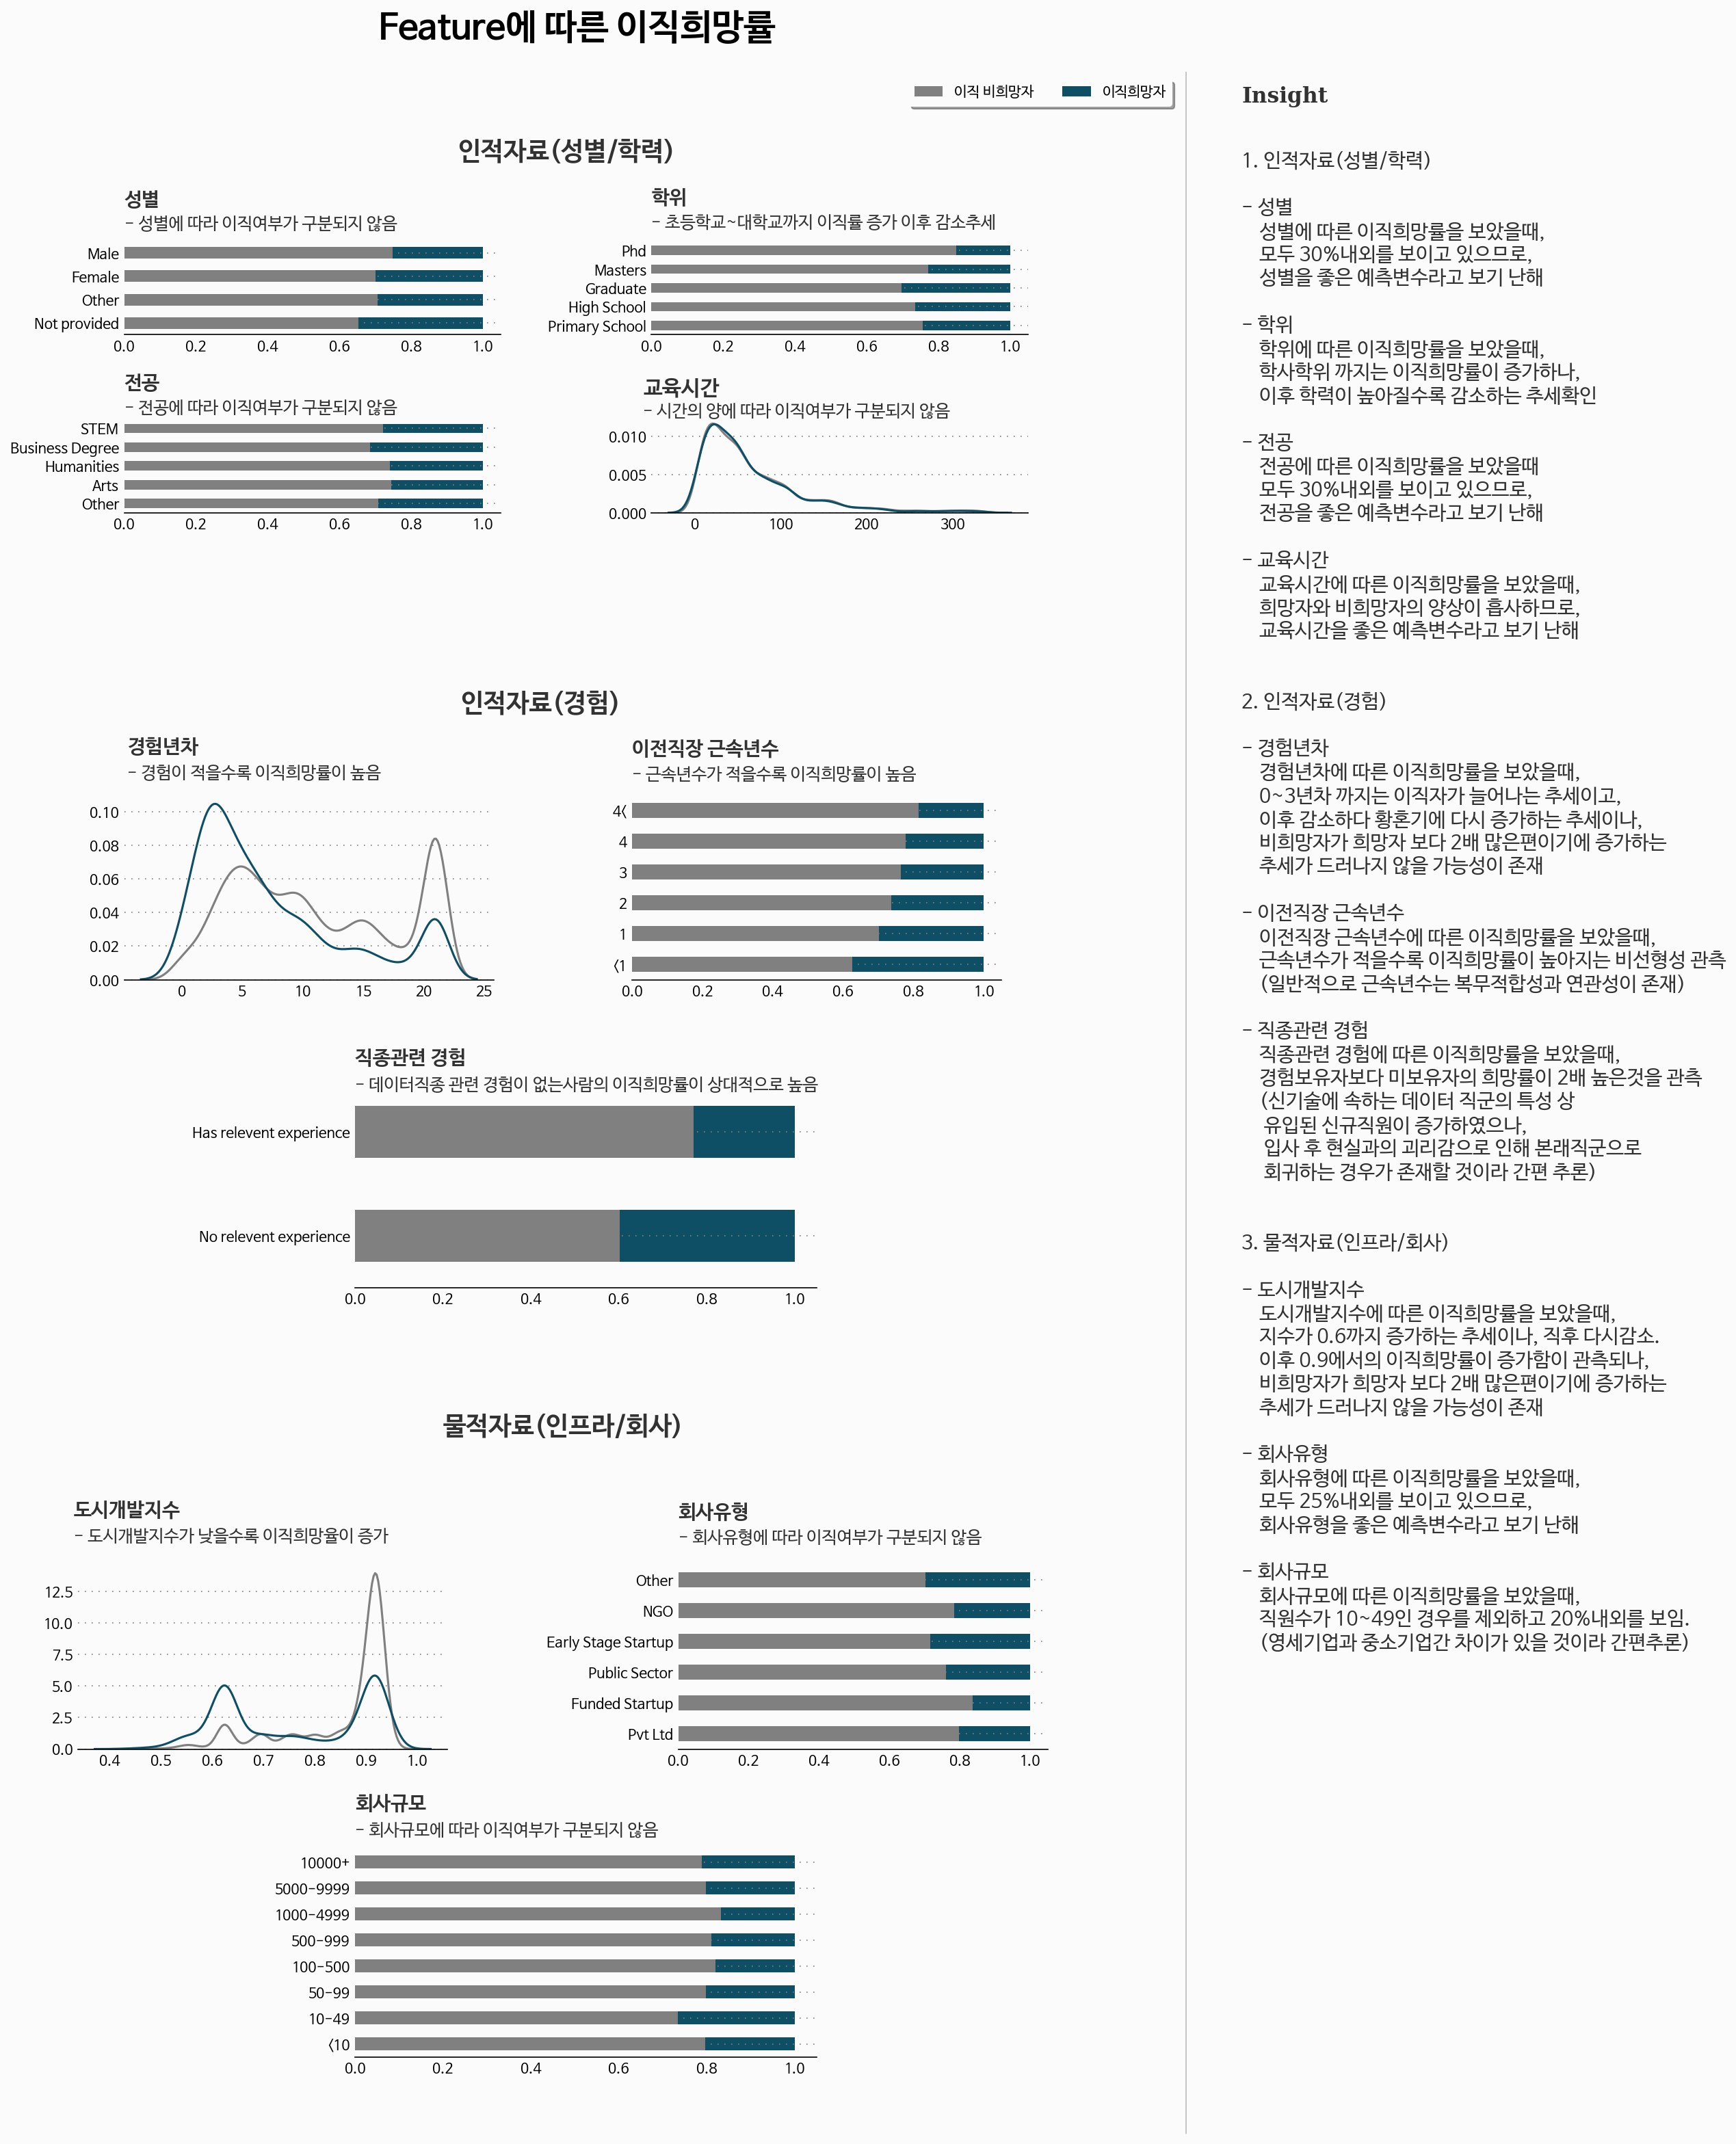

In [9]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.suptitle('Feature에 따른 이직희망률', fontsize=25, fontweight='bold', fontfamily='NanumBarunGothic', position = (0.37, 1.0+0.03))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(7, 3)
gs.update(wspace=0.4, hspace=0.9)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[4, 0])
ax8 = fig.add_subplot(gs[4, 1])
ax9 = fig.add_subplot(gs[5, 0])

ax4.set_position([0.125, 0.4, 0.20, 0.12])
ax5.set_position([0.4, 0.4, 0.20, 0.12])
ax6.set_position([0.25, 0.2, 0.25, 0.135])
ax7.set_position([0.1, -0.1, 0.20, 0.12])
ax8.set_position([0.425, -0.1, 0.20, 0.12])
ax9.set_position([0.25, -0.3, 0.25, 0.135])

# 인적자료(성별/학력)
ax0.text(0.93, 7, '인적자료(성별/학력)', fontsize=18, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")

## ax0 - gender
ax0.text(0, 5, '성별', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax0.text(0, 4, '- 성별에 따라 이직여부가 구분되지 않음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
gender_col.plot.barh(stacked=True, color = color_palette, ax = ax0)

legend_labels,_= ax0.get_legend_handles_labels()
ax0.legend(legend_labels, ["이직 비희망자", "이직희망자"], ncol=2, bbox_to_anchor=(2.8, 2.8),
           facecolor=background_color, edgecolor=background_color,
           frameon=True, shadow=True, prop={'family':'NanumBarunGothic'})

## ax1 - education_level
ax1.text(0, 6.5, '학위', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax1.text(0, 5.2, '- 초등학교~대학교까지 이직률 증가 이후 감소추세', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
edu_lev_col.plot.barh(stacked=True, color = color_palette, ax = ax1)
ax1.set_ylabel("")
ax1.get_legend().remove()

## ax2 - major_discipline
ax2.text(0, 6.1, '전공', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax2.text(0, 4.8, '- 전공에 따라 이직여부가 구분되지 않음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
major_col.plot.barh(stacked=True, color = color_palette, ax = ax2)
ax2.set_ylabel("")
ax2.get_legend().remove()

## ax3 - training_hours
ax3.text(-60, 0.0155, '교육시간', fontsize=15, fontweight='bold', fontfamily='NanumBarunGothic',color='#323232')
ax3.text(-60, 0.0125, '- 시간의 양에 따라 이직여부가 구분되지 않음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic',color='#323232')
sns.kdeplot(df_vis.loc[(df_vis["target"]==0), "training_hours"], color="gray", ax = ax3)
sns.kdeplot(df_vis.loc[(df_vis["target"]==1), "training_hours"], color="#0e4f66", ax = ax3)



# 인적자료(경험)
ax4.text(23, 0.160, '인적자료(경험)', fontsize=18, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")

## ax4 - experience
ax4.text(-4.5, 0.135, '경험년차', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax4.text(-4.5, 0.12, '- 경험이 적을수록 이직희망률이 높음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic',color='#323232')
sns.kdeplot(df_vis.loc[(df_vis["target"]==0), "experience"], color="gray", ax = ax4)
sns.kdeplot(df_vis.loc[(df_vis["target"]==1), "experience"], color="#0e4f66", ax = ax4)
ax4.set_ylabel("")

## ax5 - last_new_job
ax5.text(0, 6.8, '이전직장 근속년수', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax5.text(0, 6, '- 근속년수가 적을수록 이직희망률이 높음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
last_job_col.plot.barh(stacked=True, color = color_palette, ax = ax5)
ax5.set_ylabel("")
ax5.get_legend().remove()

## ax6 - relevent_experience
ax6.text(0, 1.65, '직종관련 경험', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax6.text(0, 1.4, '- 데이터직종 관련 경험이 없는사람의 이직희망률이 상대적으로 높음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
relevent_exp_col.plot.barh(stacked=True, color = color_palette, ax = ax6)
ax6.set_ylabel("")
ax6.get_legend().remove()

# 물적자원(인프라/회사)
ax7.text(1.05, 25, '물적자료(인프라/회사)', fontsize=18, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")

## ax7 - city_development_index
ax7.text(0.33, 18.5, '도시개발지수', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic',color='#323232')
ax7.text(0.33, 16.5, '- 도시개발지수가 낮을수록 이직희망율이 증가', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
sns.kdeplot(df_vis.loc[(df_vis["target"]==0), "city_development_index"], color="gray", ax=ax7)
sns.kdeplot(df_vis.loc[(df_vis["target"]==1), "city_development_index"], color="#0e4f66", ax=ax7)
ax7.set_ylabel("")

## ax8 - company_type
ax8.text(0, 7, '회사유형', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax8.text(0, 6.2, '- 회사유형에 따라 이직여부가 구분되지 않음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
com_type_col.plot.barh(stacked=True, color = color_palette, ax = ax8)
ax8.set_ylabel("")
ax8.get_legend().remove()

## ax9 - company_size
ax9.text(0, 9, '회사규모', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax9.text(0, 8, '- 회사규모에 따라 이직여부가 구분되지 않음', fontsize=12, fontweight='light', fontfamily='NanumBarunGothic', color="#323232")
com_size_col.plot.barh(stacked=True, color = color_palette, ax = ax9)
ax9.set_ylabel("")
ax9.get_legend().remove()


# insight

fig.text(0.73, 0.97
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.73, -0.05, '''
1. 인적자료(성별/학력)

- 성별
    성별에 따른 이직희망률을 보았을때, 
    모두 30%내외를 보이고 있으므로,
    성별을 좋은 예측변수라고 보기 난해

- 학위
    학위에 따른 이직희망률을 보았을때, 
    학사학위 까지는 이직희망률이 증가하나,
    이후 학력이 높아질수록 감소하는 추세확인

- 전공
    전공에 따른 이직희망률을 보았을때
    모두 30%내외를 보이고 있으므로,
    전공을 좋은 예측변수라고 보기 난해

- 교육시간
    교육시간에 따른 이직희망률을 보았을때,
    희망자와 비희망자의 양상이 흡사하므로,
    교육시간을 좋은 예측변수라고 보기 난해


2. 인적자료(경험)

- 경험년차
    경험년차에 따른 이직희망률을 보았을때,
    0~3년차 까지는 이직자가 늘어나는 추세이고,
    이후 감소하다 황혼기에 다시 증가하는 추세이나,
    비희망자가 희망자 보다 2배 많은편이기에 증가하는
    추세가 드러나지 않을 가능성이 존재

- 이전직장 근속년수
    이전직장 근속년수에 따른 이직희망률을 보았을때, 
    근속년수가 적을수록 이직희망률이 높아지는 비선형성 관측
    (일반적으로 근속년수는 복무적합성과 연관성이 존재)

- 직종관련 경험
    직종관련 경험에 따른 이직희망률을 보았을때,
    경험보유자보다 미보유자의 희망률이 2배 높은것을 관측
    (신기술에 속하는 데이터 직군의 특성 상
     유입된 신규직원이 증가하였으나,
     입사 후 현실과의 괴리감으로 인해 본래직군으로
     회귀하는 경우가 존재할 것이라 간편 추론)


3. 물적자료(인프라/회사)

- 도시개발지수
    도시개발지수에 따른 이직희망률을 보았을때,
    지수가 0.6까지 증가하는 추세이나, 직후 다시감소.
    이후 0.9에서의 이직희망률이 증가함이 관측되나,
    비희망자가 희망자 보다 2배 많은편이기에 증가하는
    추세가 드러나지 않을 가능성이 존재

- 회사유형
    회사유형에 따른 이직희망률을 보았을때,
    모두 25%내외를 보이고 있으므로,
    회사유형을 좋은 예측변수라고 보기 난해

- 회사규모
    회사규모에 따른 이직희망률을 보았을때,
    직원수가 10~49인 경우를 제외하고 20%내외를 보임.
    (영세기업과 중소기업간 차이가 있을 것이라 간편추론)
'''
, fontsize=14, fontweight='light', fontfamily='NanumBarunGothic',color='#323232')


l1 = lines.Line2D([0.7, 0.7], [-0.35, 0.99], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


for s in ["top","right","left"]:
    for i in range(0,10):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,10):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,10):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

>> ### **3.1_2 결측값 확인**

In [10]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value['missing values in percentage'] = missing_value['missing values in percentage'].round(2)

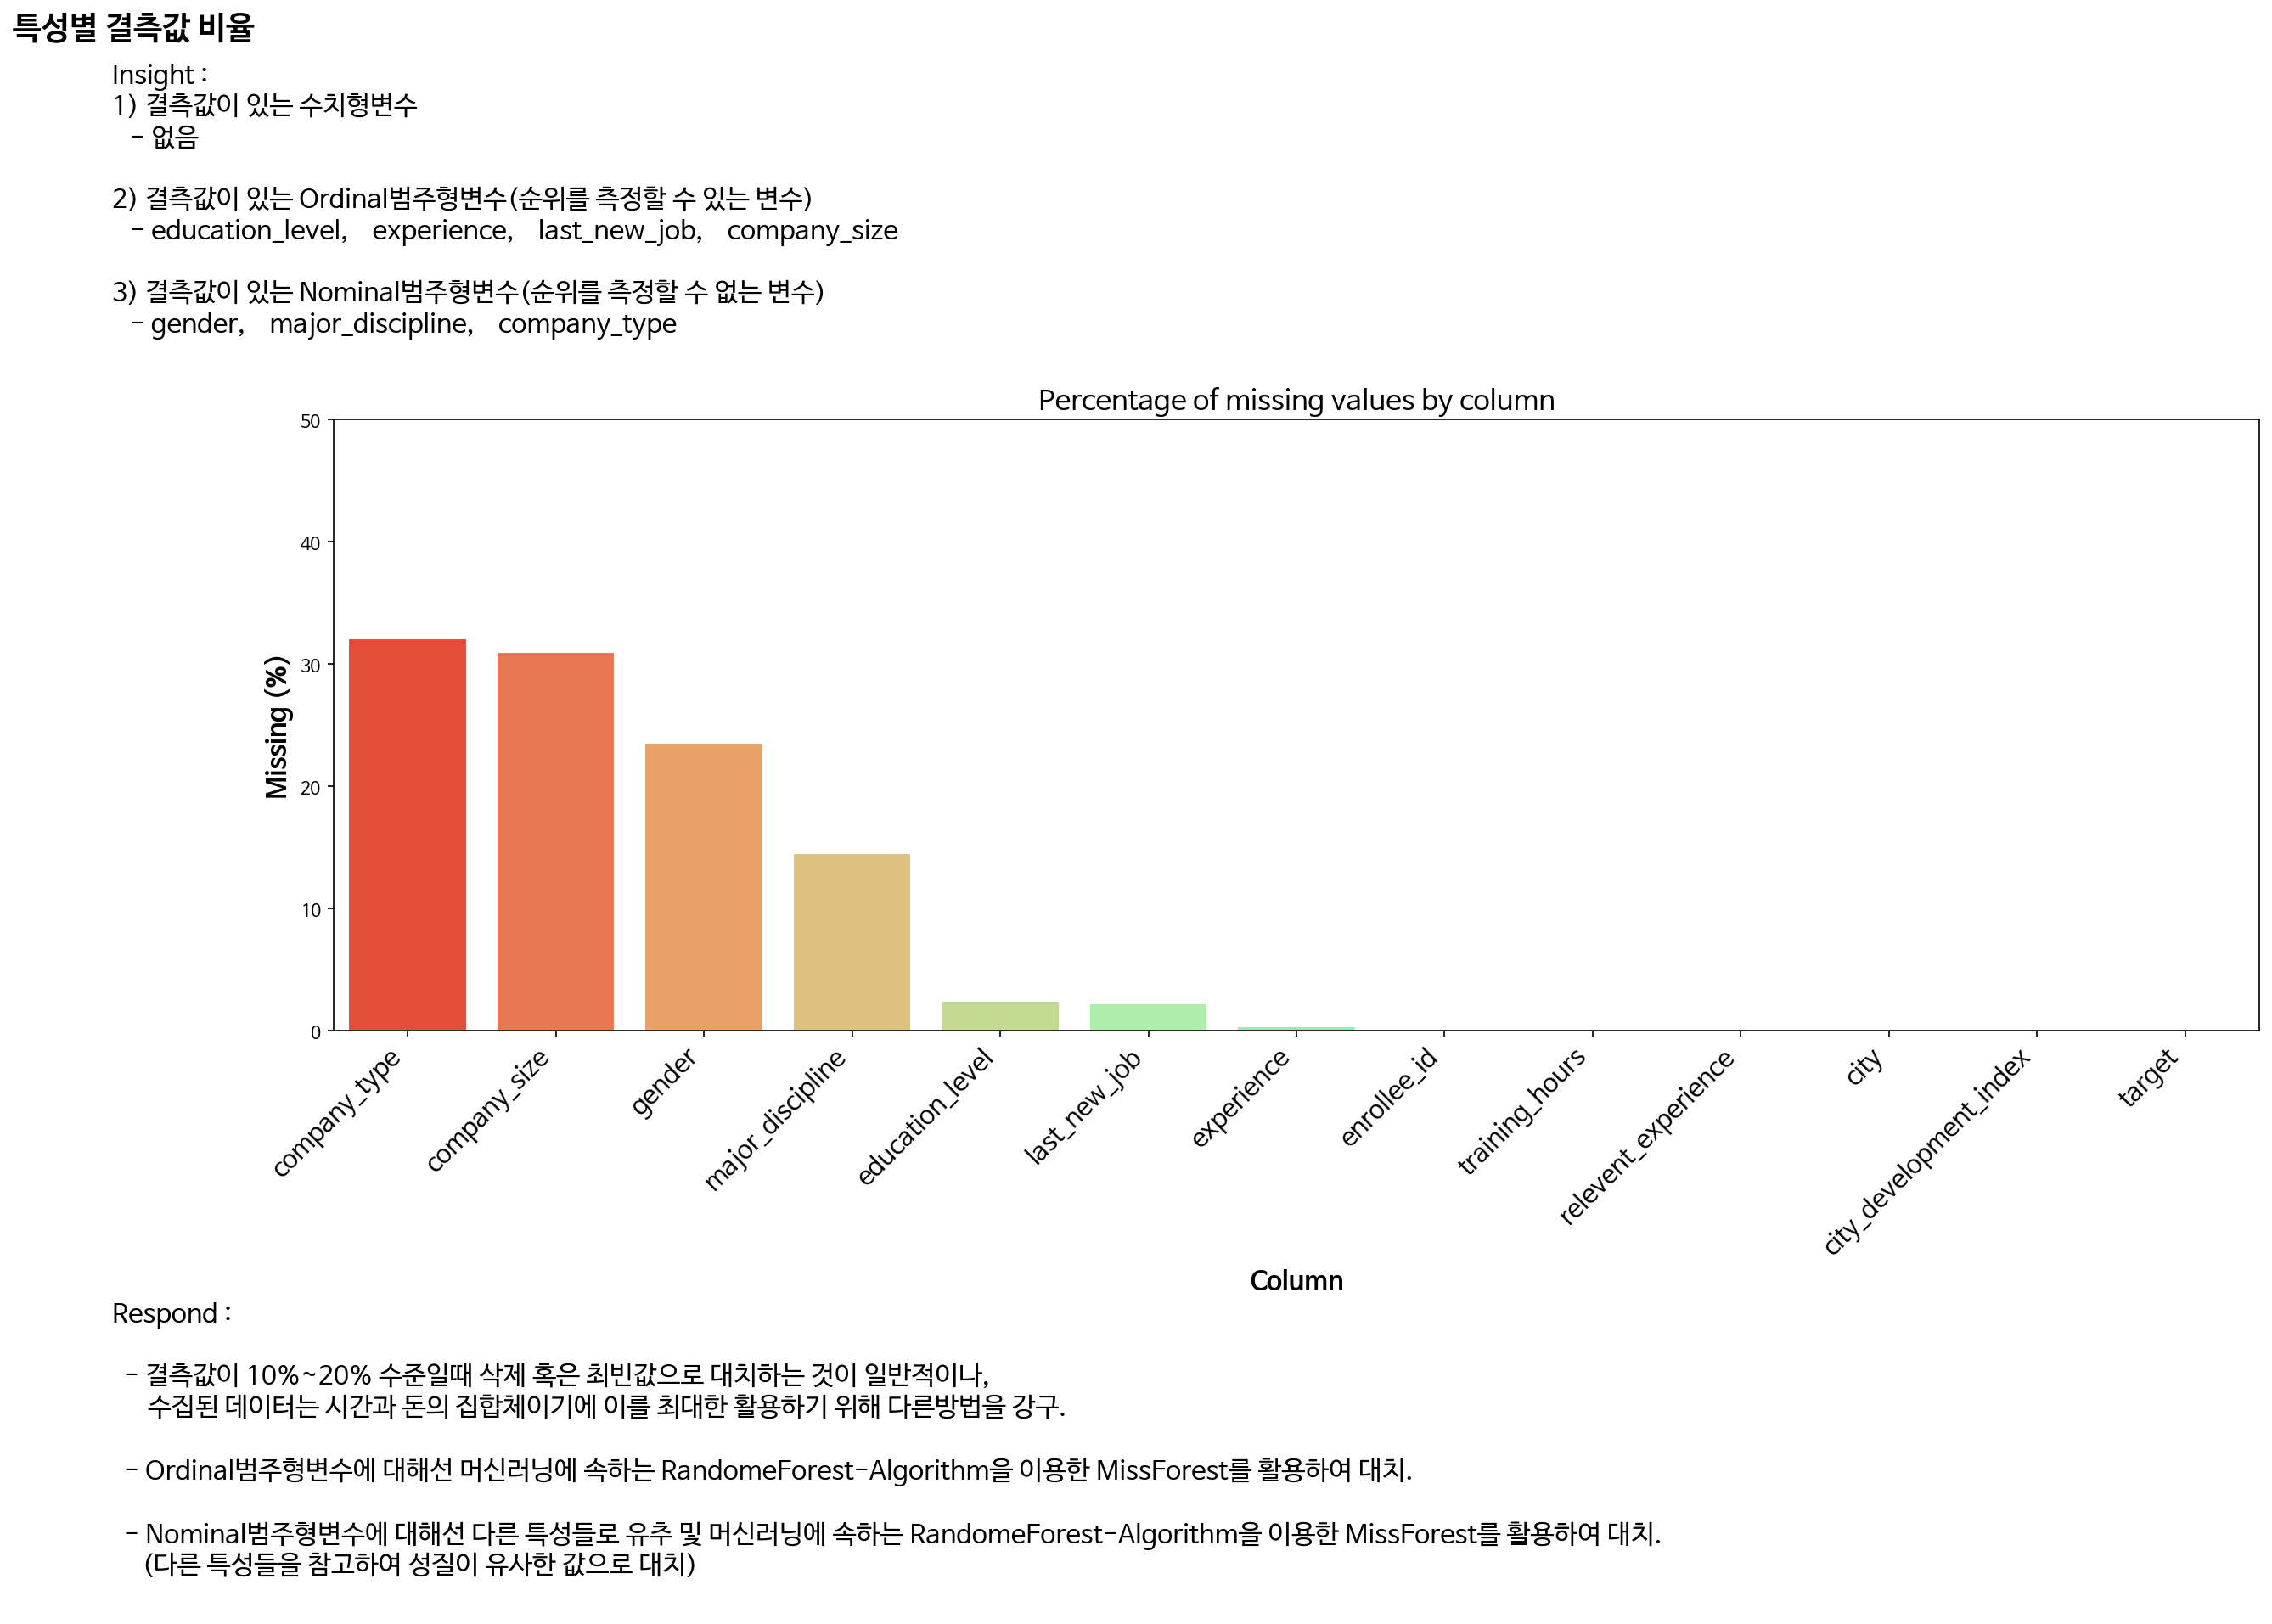

In [11]:
#그래프배경
fig, ax = plt.subplots(1, 1, figsize=(18,15), dpi=150)
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.32, wspace=0.2)
sns.set(style='whitegrid')

#그래프부문(barplot)
ax1 = sns.barplot(x='variables', y='missing values in percentage', 
                   data=missing_value.sort_values('missing values in percentage', ascending=False), palette='rainbow_r')
plt.ylim(0, 50.00)
plt.xlabel('Column', fontsize = 15, fontweight = 'bold')
plt.ylabel('Missing (%)', fontsize = 15, fontweight = 'bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='large'
                  )
plt.title('Percentage of missing values by column', size=16);


#그래프제목(네모칸)
fig.text(-0.08, 0.5,
         '''특성별 결측값 비율
         ''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

# 그래프 설명(네모칸 아래)
fig.text(-0.06, 0.35, 
         '''
         Insight :
         1) 결측값이 있는 수치형변수
            - 없음

         2) 결측값이 있는 Ordinal범주형변수(순위를 측정할 수 있는 변수)
            - education_level,　experience,　last_new_job,　company_size

         3) 결측값이 있는 Nominal범주형변수(순위를 측정할 수 없는 변수)
            - gender,　major_discipline,　company_type
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

# 그래프 설명(그래프 아래)
fig.text(-0.06, -0.3, 
         '''
         Respond :

           - 결측값이 10%~20% 수준일때 삭제 혹은 최빈값으로 대치하는 것이 일반적이나, 
               수집된 데이터는 시간과 돈의 집합체이기에 이를 최대한 활용하기 위해 다른방법을 강구.

           - Ordinal범주형변수에 대해선 머신러닝에 속하는 RandomeForest-Algorithm을 이용한 MissForest를 활용하여 대치.

           - Nominal범주형변수에 대해선 다른 특성들로 유추 및 머신러닝에 속하는 RandomeForest-Algorithm을 이용한 MissForest를 활용하여 대치.
              (다른 특성들을 참고하여 성질이 유사한 값으로 대치)
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

> ## 3.2 Data Encoding(Ordinal_Variable)
- 결측값 처리 이전 순위를 측정할 수 있는 특성들에 대하여 Mapping을 통한 Encoding
  - 데이터 전처리 작업 이전 효율증대_(자연어 존재시 처리가 오래걸림) 및 머신러닝모델 적용을 위해
  - Label Encoder 사용시 순위를 인지하지 못하고 빈도에 따라 매핑되기 때문에, 수작업 실시


In [ ]:
# Column name: education_level
# 초등학교졸업 : 1점 / 고등학교졸업 : 2점 / 학사 : 3점 / 석사 : 4점 / 박사 : 5점
education_level_map = {
    'Primary School' :    1,
    'High School'    :    2,
    'Graduate'       :    3,
    'Masters'        :    4, 
    'Phd'            :    5
    } 

# Column name: experience
# 경험년차가 높을수록 높은점수 부여
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
}

# Column name: last_new_job
# 이전직장에서 근속년수가 높을수록 높은점수 부여
last_new_job_map = {
    'Never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

# Column name: company_size
# 회사규모(사원수)가 클수록 높은점수 부여
company_size_map = {
    '<10'          :    1,
    '10/49'        :    2, 
    '50-99'        :    3,
    '100-500'      :    4,
    '500-999'      :    5, 
    '1000-4999'    :    6,
    '5000-9999'    :    7, 
    '10000+'       :    8
}

# Column name: relevent_experience
# boolean으로 분류할 수 있으나, 경험보유는구직시 메리트로 적용됨으로 경험 여부를 차등화
# 경험없음 : 0점 / 경험있음 : 1점 
relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

In [ ]:
# mapping
df_pre = df.copy()

df_pre.loc[:,'education_level'] = df['education_level'].map(education_level_map).astype('Int64')
df_pre.loc[:,'experience'] = df['experience'].map(experience_map).astype('Int64')
df_pre.loc[:,'last_new_job'] = df['last_new_job'].map(last_new_job_map).astype('Int64')
df_pre.loc[:,'company_size'] = df['company_size'].map(company_size_map).astype('Int64')
df_pre.loc[:,'relevent_experience'] = df['relevent_experience'].map(relevent_experience_map).astype('Int64')

df_pre.head()

enrollee_id  gender  education_level major_discipline  training_hours  \
0         7041    Male                3       Humanities              65   
1        29117     NaN                3             STEM              12   
2        30937  Female                3             STEM              83   
3        25290     NaN                2              NaN              29   
4        10481     NaN                3  Business Degree             214   

   relevent_experience  experience  last_new_job      city  \
0                    1           0             1   city_40   
1                    0           0             0   city_11   
2                    0           0             2   city_57   
3                    1           0             1  city_173   
4                    0           0             0  city_102   

   city_development_index company_type  company_size  target  
0                   0.776      Pvt Ltd             6       0  
1                   0.550          NaN          <NA>       0  
2                   0.866      Pvt Ltd             2       0  
3                   0.878      Pvt Ltd             4       0  
4                   0.804          NaN          <NA>       0

> ## 3.3 Data Preprocessing
- 3.3_1 Remove Outlier :  
결측치 대치 소요를 줄이기 위해 training_hours	column에 대한 이상치처리(삭제) 실시
- 3.3_2 Processing By Analogy With Another Feature :  
다른 특성으로 유추할 수 있는 결측치 대치
- 3.3_3 Can't Processing By Other Feature :  
다른 특성으로 유추할 수 없는 결측치 대치
- 3.3_4 Ordinal Categorical Variable Missing Value Processing :  
우열을 가릴 수 있는 순서형변수에 대해 MissForest를 활용하여 결측값 대치
- 3.3_5 Nominal Categorical Variable Missing Value Processing :  
우열을 가릴 수 없는 명목형변수에 대해 MissForest를 활용하여 결측값 대치
- 3.3_6 Reshape :  
결측치대치가 끝난 데이터를 원본형태로 복원
고유값인 enrollee_id를 인덱스로 활용

>> ### **3.3_1 Remove Outlier**
- 결측치 대치 소요를 줄이기 위해 training_hours	column에 대한 이상치처리(삭제) 실시

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

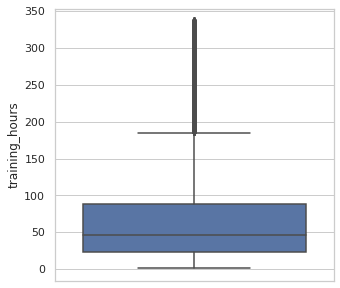

In [ ]:
# 수치형 변수 중 연속형인 training_hours에 대한 이상치 확인 및 제거
plt.figure(figsize = (5,5))
sns.boxplot(y = 'training_hours', data = df_pre);
df_pre['training_hours'].describe()

In [ ]:
def remove_outliers(dataframe, remove_col):
    df = dataframe
    k = remove_col
    level_1q = df[k].quantile(0.25) # 제1사분위수
    level_3q = df[k].quantile(0.75) # 제3사분위수
    IQR = level_3q - level_1q 
    rev_range = 1.5  # 제거 범위 조절 변수
    print("삭제될 데이터(%) : ", 
          (len(df) - len(df[(df[k] <= level_3q + (rev_range * IQR)) & (df[k] >= level_1q - (rev_range * IQR))])) / len(df_pre) * 100
          )
    print("기존 데이터 열 : ", len(df))
    df = df[(df[k] <= level_3q + (rev_range * IQR)) & (df[k] >= level_1q - (rev_range * IQR))]
    df = df.reset_index(drop=True)
    print("이상치 제거 후 데이터 열 :", len(df))
    return df

In [ ]:
df_pre = remove_outliers(df_pre, 'training_hours')
df_pre.head()

삭제될 데이터(%) :  5.136235515189477
기존 데이터 열 :  19158
이상치 제거 후 데이터 열 : 18174


enrollee_id  gender  education_level major_discipline  training_hours  \
0         7041    Male                3       Humanities              65   
1        29117     NaN                3             STEM              12   
2        30937  Female                3             STEM              83   
3        25290     NaN                2              NaN              29   
4        24226  Female                3             STEM              13   

   relevent_experience  experience  last_new_job      city  \
0                    1           0             1   city_40   
1                    0           0             0   city_11   
2                    0           0             2   city_57   
3                    1           0             1  city_173   
4                    1           0             1   city_21   

   city_development_index company_type  company_size  target  
0                   0.776      Pvt Ltd             6       0  
1                   0.550          NaN          <NA>       0  
2                   0.866      Pvt Ltd             2       0  
3                   0.878      Pvt Ltd             4       0  
4                   0.624      Pvt Ltd             3       0

>> ### **3.3_2 Processing By Analogy With Another Feature**
  * education_level(학력)이 고등학교 미만일 경우 일반적으로 major_discipline(전공)이 없다고 가정
  * company_size(회사규모), company_type(회사유형)가 둘다 'NaN' 일경우 미취업자로 판단  
  (last_new_job column의 Never같이 두 특성에는 미표기에 대한 항목이 없어 미표기가 결측치가 되었을것이라
   추측)


In [ ]:
# To fill cell
def draw_color_cell(df,color,font_size,font_color,border):
    color = f'background-color:{color};font-size:{font_size};color:{font_color};border:{border}'
    return color

def draw_2color_cell(df):
        return ['background-color:#ff9090;font-size:120%;color:black;border:2px solid blue' if x ==288 or x==1915  else 
        ('background-color:#D1B2FF;font-size:120%;color:black;border:2px solid #8041D9' if x ==431   else 
        'background-color: default') for x in df]    

In [ ]:
# major_discipline

df_cros = df_pre.copy()
df_cros['major_discipline'].fillna('NaN', inplace = True)
df_cros['education_level'].fillna(0, inplace = True)

df_cros = pd.crosstab(df_cros['major_discipline'], df_cros['education_level'])

df_cros.style.apply(draw_2color_cell, axis=0)

# 학력이 결측치(0)이고, 전공도 결측치(NaN)일 경우(보라색배경) 유추할 수 있는 정보가 없으므로, 탈락처리
# 초등학교 졸업(1), 고등학교 졸업(2)의 학력을 가진 이들의 전공은 없으며, 해당되는 결측치(붉은색 배경)를 No Major로 대치한다.

In [ ]:
# education_level(학력)을 통한 major_discipline(전공) 결측치 대체

# Encoding info : Primary School = 1, High School = 2
print("고등학교 졸업 이하 학력의 전공 : ",
      df_pre[df_pre['education_level'] <= 2]['major_discipline'].unique()) # NaN값만 존재함을 확인

# 학력과 전공이 모두 결측치인 경우 탈락처리
null_index = df_pre[(df_pre['education_level'].isna()) & (df_pre['major_discipline'].isna())].index
df_pre.drop(null_index, inplace = True)
print("삭제된 데이터 : ", len(null_index))

# 고등학교 이하의 학력을 가진 이들의 전공 결측값을 No Major로 대치
df_pre.loc[(df_pre['education_level']<=2) & (df_pre['major_discipline'].isna()), 'major_discipline'] = 'No Major'

print("대치 후 전공특성 구성 값 : ",df_pre['major_discipline'].unique())

print("전공특성 남은 결측치 : ", df_pre['major_discipline'].isna().sum())

고등학교 졸업 이하 학력의 전공 :  [nan]
삭제된 데이터 :  431
대치 후 전공특성 구성 값 :  ['Humanities' 'STEM' 'No Major' 'Business Degree' 'Arts' 'Other']
전공특성 남은 결측치 :  0


In [ ]:
df_pre.isna().sum()

enrollee_id                  0
gender                    4084
education_level              0
major_discipline             0
training_hours               0
relevent_experience          0
experience                  49
last_new_job               375
city                         0
city_development_index       0
company_type              5558
company_size              5364
target                       0
dtype: int64

In [ ]:
# company_size, company_type

df_cros = df_pre.copy()
df_cros['company_type'].fillna('NaN', inplace = True)
df_cros['company_size'].fillna(0, inplace = True)

df_cros = pd.crosstab(df_cros['company_type'], df_cros['company_size'])

df_cros.style.applymap(draw_color_cell,
                       color='#ff9090',
                       font_size='120%',
                       font_color='black',
                       border='2px solid blue',
                       subset=pd.IndexSlice['NaN',[0]])

# 회사규모, 회사종류가 모두 결측치인 경우 미취업자이기에 미기입 한것이라 가정 / 해당 결측치를 No Job으로 대치

In [ ]:
# company_size & company_type

# 둘다 NaN인 경우의 데이터 수 = 5099
print("두 feature 모두 NaN : \n", df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].shape[0])

# 둘중 하나만 NaN인 경우의 데이터 수 = 1289
print("한개 feature만 NaN : \n",
      (df_pre[(df_pre['company_type'].isnull()) | (df_pre['company_size'].isnull())].shape[0]) - (df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].shape[0]))

# 둘다 NaN일경우 두 특성 모두 한번에 제거해야하기 때문에 인덱스로 접근(index로 제거하지 않으면, 하나만 NaN인 경우의 데이터로 판별됨)
com_index = df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].index.to_list()

# 제거
for i in com_index:
  df_pre.at[i, 'company_size'] = 0
  df_pre.at[i, 'company_type'] = 'No Job'

print("제거 후 한개 feature만 NaN : \n", df_pre[(df_pre['company_type'].isnull()) | (df_pre['company_size'].isnull())].shape[0])

# dictionary에 추가
company_size_map['No Job'] = 0

두 feature 모두 NaN : 
 4841
한개 feature만 NaN : 
 1240
제거 후 한개 feature만 NaN : 
 1240


>> ### **3.3_3 Can't Processing By Other Feature**
- gender(성별)은 다른 feature로 알아낼 수 없기에, 결측치를 'No Data'로 대치

In [ ]:
df_pre['gender'].fillna("No Data", inplace=True)

In [ ]:
df_pre['gender'].unique()

array(['Male', 'No Data', 'Female', 'Other'], dtype=object)

>> ### **3.3_4 Ordinal Categorical Variable Missing Value Processing**
- MissForest를 통해 순서형 범주데이터 결측값 제거
- 데이터 누수를 막기 위해 target 제외, 고유값 특성 제거(city),  
다른특성과 관계성이 없다고 판단된 특성 제거(gender), Nominal Data 특성 제거(company_type)
- *(experience,　last new job,　education level　company size 순 실시)*

---

In [ ]:
df_pre.isna().sum().sort_values()

enrollee_id                 0
gender                      0
education_level             0
major_discipline            0
training_hours              0
relevent_experience         0
city                        0
city_development_index      0
target                      0
experience                 49
last_new_job              375
company_size              523
company_type              717
dtype: int64

In [ ]:
df_pre_MF = df_pre.copy()

# 위 기술한 특성 제거
df_pre_MF.drop(columns = ['target', 'city', 'gender', 'company_type'], inplace=True)
df_pre_MF.head()

enrollee_id  education_level major_discipline  training_hours  \
0         7041                3       Humanities              65   
1        29117                3             STEM              12   
2        30937                3             STEM              83   
3        25290                2         No Major              29   
4        24226                3             STEM              13   

   relevent_experience  experience  last_new_job  city_development_index  \
0                    1           0             1                   0.776   
1                    0           0             0                   0.550   
2                    0           0             2                   0.866   
3                    1           0             1                   0.878   
4                    1           0             1                   0.624   

   company_size  
0             6  
1             0  
2             2  
3             4  
4             3

In [ ]:
# MissForest 적용

categorical_columns = ['experience', 'last_new_job', 'education_level', 'company_size']

for col in categorical_columns:
  df_pre_MF[col] = df_pre_MF[col].astype('string')

for col in categorical_columns:
  df_pre_MF[col] = df_pre_MF[col].fillna('NaN')

for col in categorical_columns:
  df_pre_MF[col] = df_pre_MF[col].astype('category')

df_pre_MF = pd.get_dummies(df_pre_MF, columns = ['major_discipline'])

cat_cols = [df_pre_MF.columns.get_loc(col) for col in df_pre_MF.select_dtypes(['category']).columns.tolist()]

imputer = MissForest(verbose = 0, random_state=2)
imputed = imputer.fit_transform(df_pre_MF, cat_vars=cat_cols)

imputed = pd.DataFrame(imputed, columns=df_pre_MF.columns.tolist())

df_pre_MF = pd.DataFrame(imputed)
df_pre_MF = imputed.loc[:,df_pre_MF.columns!="city_development_index"].astype(int)
df_pre_MF = df_pre_MF[df_pre_MF.columns.drop(list(df_pre_MF.filter(regex='major_discipline')))]
df_pre_MF.head()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


enrollee_id  education_level  training_hours  relevent_experience  \
0         7041                3              65                    1   
1        29117                3              12                    0   
2        30937                3              83                    0   
3        25290                2              29                    1   
4        24226                3              13                    1   

   experience  last_new_job  company_size  
0           0             1             6  
1           0             0             0  
2           0             2             2  
3           0             1             4  
4           0             1             3

In [ ]:
# 순서형 변수에 대한 결측치 처리 완료
df_pre_MF.isna().sum()

enrollee_id            0
education_level        0
training_hours         0
relevent_experience    0
experience             0
last_new_job           0
company_size           0
dtype: int64

>> ### **3.3_5 Nominal Categorical Variable Missing Value Processing**
- MissForest를 통해 명목형 범주데이터 결측값 제거

In [ ]:
# 결측치 처리에 참고할 feature 합치기
df_pre_MF = pd.merge(df_pre_MF, df_pre[['enrollee_id', 'city_development_index', 'company_type', 'major_discipline']], on='enrollee_id', how= 'inner')

In [ ]:
# MissForest 기입을 위한 Encoding

le_company_type = LabelEncoder()
le_company_type.fit(df_pre_MF['company_type'])

for i, label in enumerate(le_company_type.classes_):
    print(i, '->', label)

le_company_type = le_company_type.fit(df_pre_MF['company_type'])
df_pre_MF['company_type'] = le_company_type.transform(df_pre_MF['company_type'])

df_pre_MF['company_type'] = df_pre_MF['company_type'].astype('string')
df_pre_MF['company_type'] = df_pre_MF['company_type'].replace('7','NaN')
df_pre_MF['company_type'] = df_pre_MF['company_type'].astype('category')

0 -> Early Stage Startup
1 -> Funded Startup
2 -> NGO
3 -> No Job
4 -> Other
5 -> Public Sector
6 -> Pvt Ltd
7 -> nan


In [ ]:
# MissForest 적용

df_pre_MF = pd.get_dummies(df_pre_MF, columns = ['major_discipline'])

cat_cols = df.columns.get_loc('company_type')

imputer = MissForest(verbose = 0, random_state=2)
imputed = imputer.fit_transform(df_pre_MF, cat_vars=cat_cols)

imputed = pd.DataFrame(imputed, columns=df_pre_MF.columns.tolist())

df_pre_MF = pd.DataFrame(imputed)
df_pre_MF = imputed.loc[:,df_pre_MF.columns!="city_development_index"].astype(int)
df_pre_MF = df_pre_MF[df_pre_MF.columns.drop(list(df_pre_MF.filter(regex='major_discipline')))]
df_pre_MF['company_type'] = le_company_type.inverse_transform(df_pre_MF['company_type'])
df_pre_MF.head()

Iteration: 0
Iteration: 1
Iteration: 2


enrollee_id  education_level  training_hours  relevent_experience  \
0         7041                3              65                    1   
1        29117                3              12                    0   
2        30937                3              83                    0   
3        25290                2              29                    1   
4        24226                3              13                    1   

   experience  last_new_job  company_size company_type  
0           0             1             6      Pvt Ltd  
1           0             0             0       No Job  
2           0             2             2      Pvt Ltd  
3           0             1             4      Pvt Ltd  
4           0             1             3      Pvt Ltd

In [ ]:
df_pre_MF.isna().sum()

enrollee_id            0
education_level        0
training_hours         0
relevent_experience    0
experience             0
last_new_job           0
company_size           0
company_type           0
dtype: int64

>> ### **3.3_6 Reshape**
- 결측치처리가 끝난 데이터와 결측치처리에 사용되지 않은 feature 결합으로 원본데이터 형태로 복원
- 고유값인 enrollee_id를 인덱스로 사용
- city_development_index와 1대1 매칭되는 city특성 삭제

In [ ]:
# 결측치처리가 끝난 데이터에 없는 column 추출
a = df_raw.columns.to_list()
b = df_pre_MF.columns.to_list()
a_sub_b = [x for x in a if x not in b]
a_sub_b.append('enrollee_id')

# 원본데이터 형태 복원
df_pre_fin = pd.merge(df_pre_MF, df_pre[a_sub_b], on='enrollee_id', how= 'inner')
df_pre_fin=df_pre_fin[['enrollee_id', 'gender', 'education_level', 'major_discipline', 
                       'training_hours', 'relevent_experience', 'experience', 'last_new_job',
                       'city', 'city_development_index', 'company_type', 'company_size', 'target']]

print("원본데이터 형태 :", df_raw.shape)
print("결측값 제거 데이터 형태 :", df_pre_fin.shape)
print("제거된 열 수 :", df_raw.shape[0]-df_pre_fin.shape[0])


원본데이터 형태 : (19158, 13)
결측값 제거 데이터 형태 : (17743, 13)
제거된 열 수 : 1415


In [ ]:
df_pre_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17743 entries, 0 to 17742
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             17743 non-null  int64  
 1   gender                  17743 non-null  object 
 2   education_level         17743 non-null  int64  
 3   major_discipline        17743 non-null  object 
 4   training_hours          17743 non-null  int64  
 5   relevent_experience     17743 non-null  int64  
 6   experience              17743 non-null  int64  
 7   last_new_job            17743 non-null  int64  
 8   city                    17743 non-null  object 
 9   city_development_index  17743 non-null  float64
 10  company_type            17743 non-null  object 
 11  company_size            17743 non-null  int64  
 12  target                  17743 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.9+ MB


In [ ]:
df_pre_fin.head()

enrollee_id   gender  education_level major_discipline  training_hours  \
0         7041     Male                3       Humanities              65   
1        29117  No Data                3             STEM              12   
2        30937   Female                3             STEM              83   
3        25290  No Data                2         No Major              29   
4        24226   Female                3             STEM              13   

   relevent_experience  experience  last_new_job      city  \
0                    1           0             1   city_40   
1                    0           0             0   city_11   
2                    0           0             2   city_57   
3                    1           0             1  city_173   
4                    1           0             1   city_21   

   city_development_index company_type  company_size  target  
0                   0.776      Pvt Ltd             6       0  
1                   0.550       No Job             0       0  
2                   0.866      Pvt Ltd             2       0  
3                   0.878      Pvt Ltd             4       0  
4                   0.624      Pvt Ltd             3       0

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열

df_pre_fin = df_pre_fin.sort_values('enrollee_id')
df_pre_fin = df_pre_fin.set_index('enrollee_id')
df_pre_fin.tail()

gender  education_level major_discipline  training_hours  \
enrollee_id                                                             
33375          Male                3             STEM              51   
33376        Female                4  Business Degree              74   
33377          Male                3            Other              27   
33379          Male                3             STEM              81   
33380          Male                3             STEM             168   

             relevent_experience  experience  last_new_job      city  \
enrollee_id                                                            
33375                          1          16             1  city_103   
33376                          1           8             4   city_16   
33377                          1          10             2   city_65   
33379                          1          18             2  city_103   
33380                          0          14             2   city_83   

             city_development_index   company_type  company_size  target  
enrollee_id                                                               
33375                         0.920  Public Sector             3       0  
33376                         0.910  Public Sector             6       0  
33377                         0.802        Pvt Ltd             4       0  
33379                         0.920        Pvt Ltd             1       0  
33380                         0.923        Pvt Ltd             8       0

In [ ]:
# city는 city_development_index와 매칭됨으로, 연속형 변수인 city_development_index만 있어도 무방

df_pre_fin.drop(['city'], axis = 1, inplace = True)
df_pre_fin.head()

gender  education_level major_discipline  training_hours  \
enrollee_id                                                            
1             Male                2         No Major             150   
2             Male                5             STEM             128   
4             Male                4             STEM              13   
5             Male                4             STEM              12   
7             Male                4             STEM              18   

             relevent_experience  experience  last_new_job  \
enrollee_id                                                  
1                              0           2             0   
2                              0          15             3   
4                              0           9             5   
5                              1          10             1   
7                              1          13             1   

             city_development_index         company_type  company_size  target  
enrollee_id                                                                     
1                             0.920              Pvt Ltd             0       0  
2                             0.920                  NGO             8       1  
4                             0.920        Public Sector             3       0  
5                             0.855  Early Stage Startup             1       0  
7                             0.897               No Job             0       0

> ## 3.4 Data Balancing
- 편향된 데이터의 균형조절 여부에 따라 모델의 성능이 달라지는지 확인하기 위해 다섯개의 데이터셋 운영  
(Basic, SMOTE, ADASYN, SMOTE-Tomek, SMOTE-ENN)
- 3.4_1 Before Over Sampling
 - 기존 전처리 후 데이터를 학습데이터셋과 테스트데이터셋으로 split
- 3.4_2 Sampling for Imbalanced Data
 - SMOTE Algorithm을 활용하여 데이터불균형을 해소한 데이터(Over Sampling)
 - ADASYN Algorithm을 활용하여 데이터불균형을 해소한 데이터(Over Sampling)
 - SMOTE-Tomek Algorithm을 활용하여 데이터불균형을 해소한 데이터(Over Sampling + Under Sampling)
 - SMOTE-ENN Algorithm을 활용하여 데이터불균형을 해소한 데이터(Over Sampling + Under Sampling)

>> ### **3.4_1 Before Over Sampling**
- 데이터의 불균형 확인
- 명목형 변수 OneHot-Encoding
- train / test set 형성

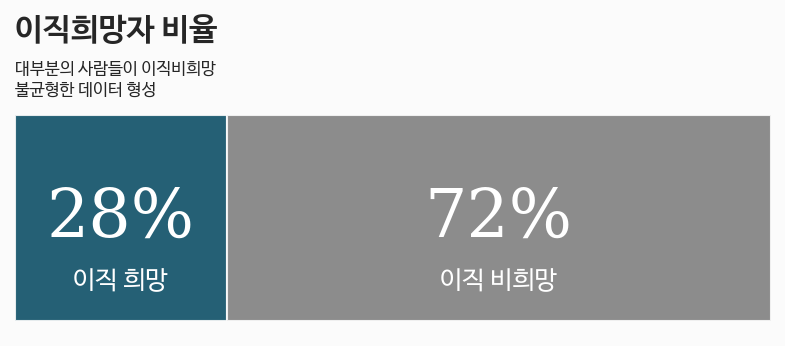

In [ ]:
# 데이터 불균형 확인

x=df_pre_fin.groupby(['target'])['target'].count()
y=len(df_pre_fin)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Hunt')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Hunt')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("이직 희망", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='NanumBarunGothic',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("이직 비희망", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='NanumBarunGothic',color='white')


fig.text(0.125,1.1,'이직희망자 비율', fontfamily='NanumBarunGothic',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'대부분의 사람들이 이직비희망\n불균형한 데이터 형성',fontfamily='NanumBarunGothic',fontsize=8)  


plt.show()

In [ ]:
# 명목형 변수 추출

obj_col = df_pre_fin.select_dtypes(['object']).columns.tolist()
obj_col

['gender', 'major_discipline', 'company_type']

In [ ]:
# 명목형 변수 OneHot-Encoding

df_pre_fin = pd.get_dummies(df_pre_fin, columns = obj_col)
df_pre_fin.head()

education_level  training_hours  relevent_experience  experience  \
enrollee_id                                                                     
1                          2             150                    0           2   
2                          5             128                    0          15   
4                          4              13                    0           9   
5                          4              12                    1          10   
7                          4              18                    1          13   

             last_new_job  city_development_index  company_size  target  \
enrollee_id                                                               
1                       0                   0.920             0       0   
2                       3                   0.920             8       1   
4                       5                   0.920             3       0   
5                       1                   0.855             1       0   
7                       1                   0.897             0       0   

             gender_Female  gender_Male  ...  major_discipline_No Major  \
enrollee_id                              ...                              
1                        0            1  ...                          1   
2                        0            1  ...                          0   
4                        0            1  ...                          0   
5                        0            1  ...                          0   
7                        0            1  ...                          0   

             major_discipline_Other  major_discipline_STEM  \
enrollee_id                                                  
1                                 0                      0   
2                                 0                      1   
4                                 0                      1   
5                                 0                      1   
7                                 0                      1   

             company_type_Early Stage Startup  company_type_Funded Startup  \
enrollee_id                                                                  
1                                           0                            0   
2                                           0                            0   
4                                           0                            0   
5                                           1                            0   
7                                           0                            0   

             company_type_NGO  company_type_No Job  company_type_Other  \
enrollee_id                                                              
1                           0                    0                   0   
2                           1                    0                   0   
4                           0                    0                   0   
5                           0                    0                   0   
7                           0                    1                   0   

             company_type_Public Sector  company_type_Pvt Ltd  
enrollee_id                                                    
1                                     0                     1  
2                                     0                     0  
4                                     1                     0  
5                                     0                     0  
7                                     0                     0  

[5 rows x 25 columns]

In [ ]:
# train / test set 형성

target = 'target'
feature = df_pre_fin.drop([target], axis = 1).columns

train_base, test_base = train_test_split(df_pre_fin, train_size = 0.8, test_size = 0.2,
                              stratify = df_pre_fin[target], random_state = 2)

In [ ]:
X_train_basic = train_base[feature]
y_train_basic = train_base[target]
X_test = test_base[feature]
y_test = test_base[target]

In [ ]:
# OneHot-Encoding후 split한 data set이 유사하게 나뉘어 졌는지 확인하기 위해 형태 변경

def mk_vis_df(df_X, df_y):
  df_vis_x = df_X.copy()
  df_vis_y = df_y.copy()
  col_list = ['gender', 'company_type', 'major_discipline']

  for i in df_vis_x.columns[8:] :
    lst = i.split('_')
    value = lst[-1]
    df_vis_x[i].replace([0,1],["", value], inplace = True)

  for i in col_list :
    cols = list(df_vis_x.filter(regex=i))
    df_vis_x[i] = df_vis_x[cols].apply(lambda row:''.join(row.values.astype(str)), axis=1)
    df_vis_x = df_vis_x[df_vis_x.columns.drop(list(df_vis_x.filter(regex=(i+'_'))))]

  df_vis = df_vis_x.join(df_vis_y, how = 'outer')
  return (df_vis)

In [ ]:
train_df = mk_vis_df(X_train_basic,y_train_basic)
test_df = mk_vis_df(X_test,y_test)

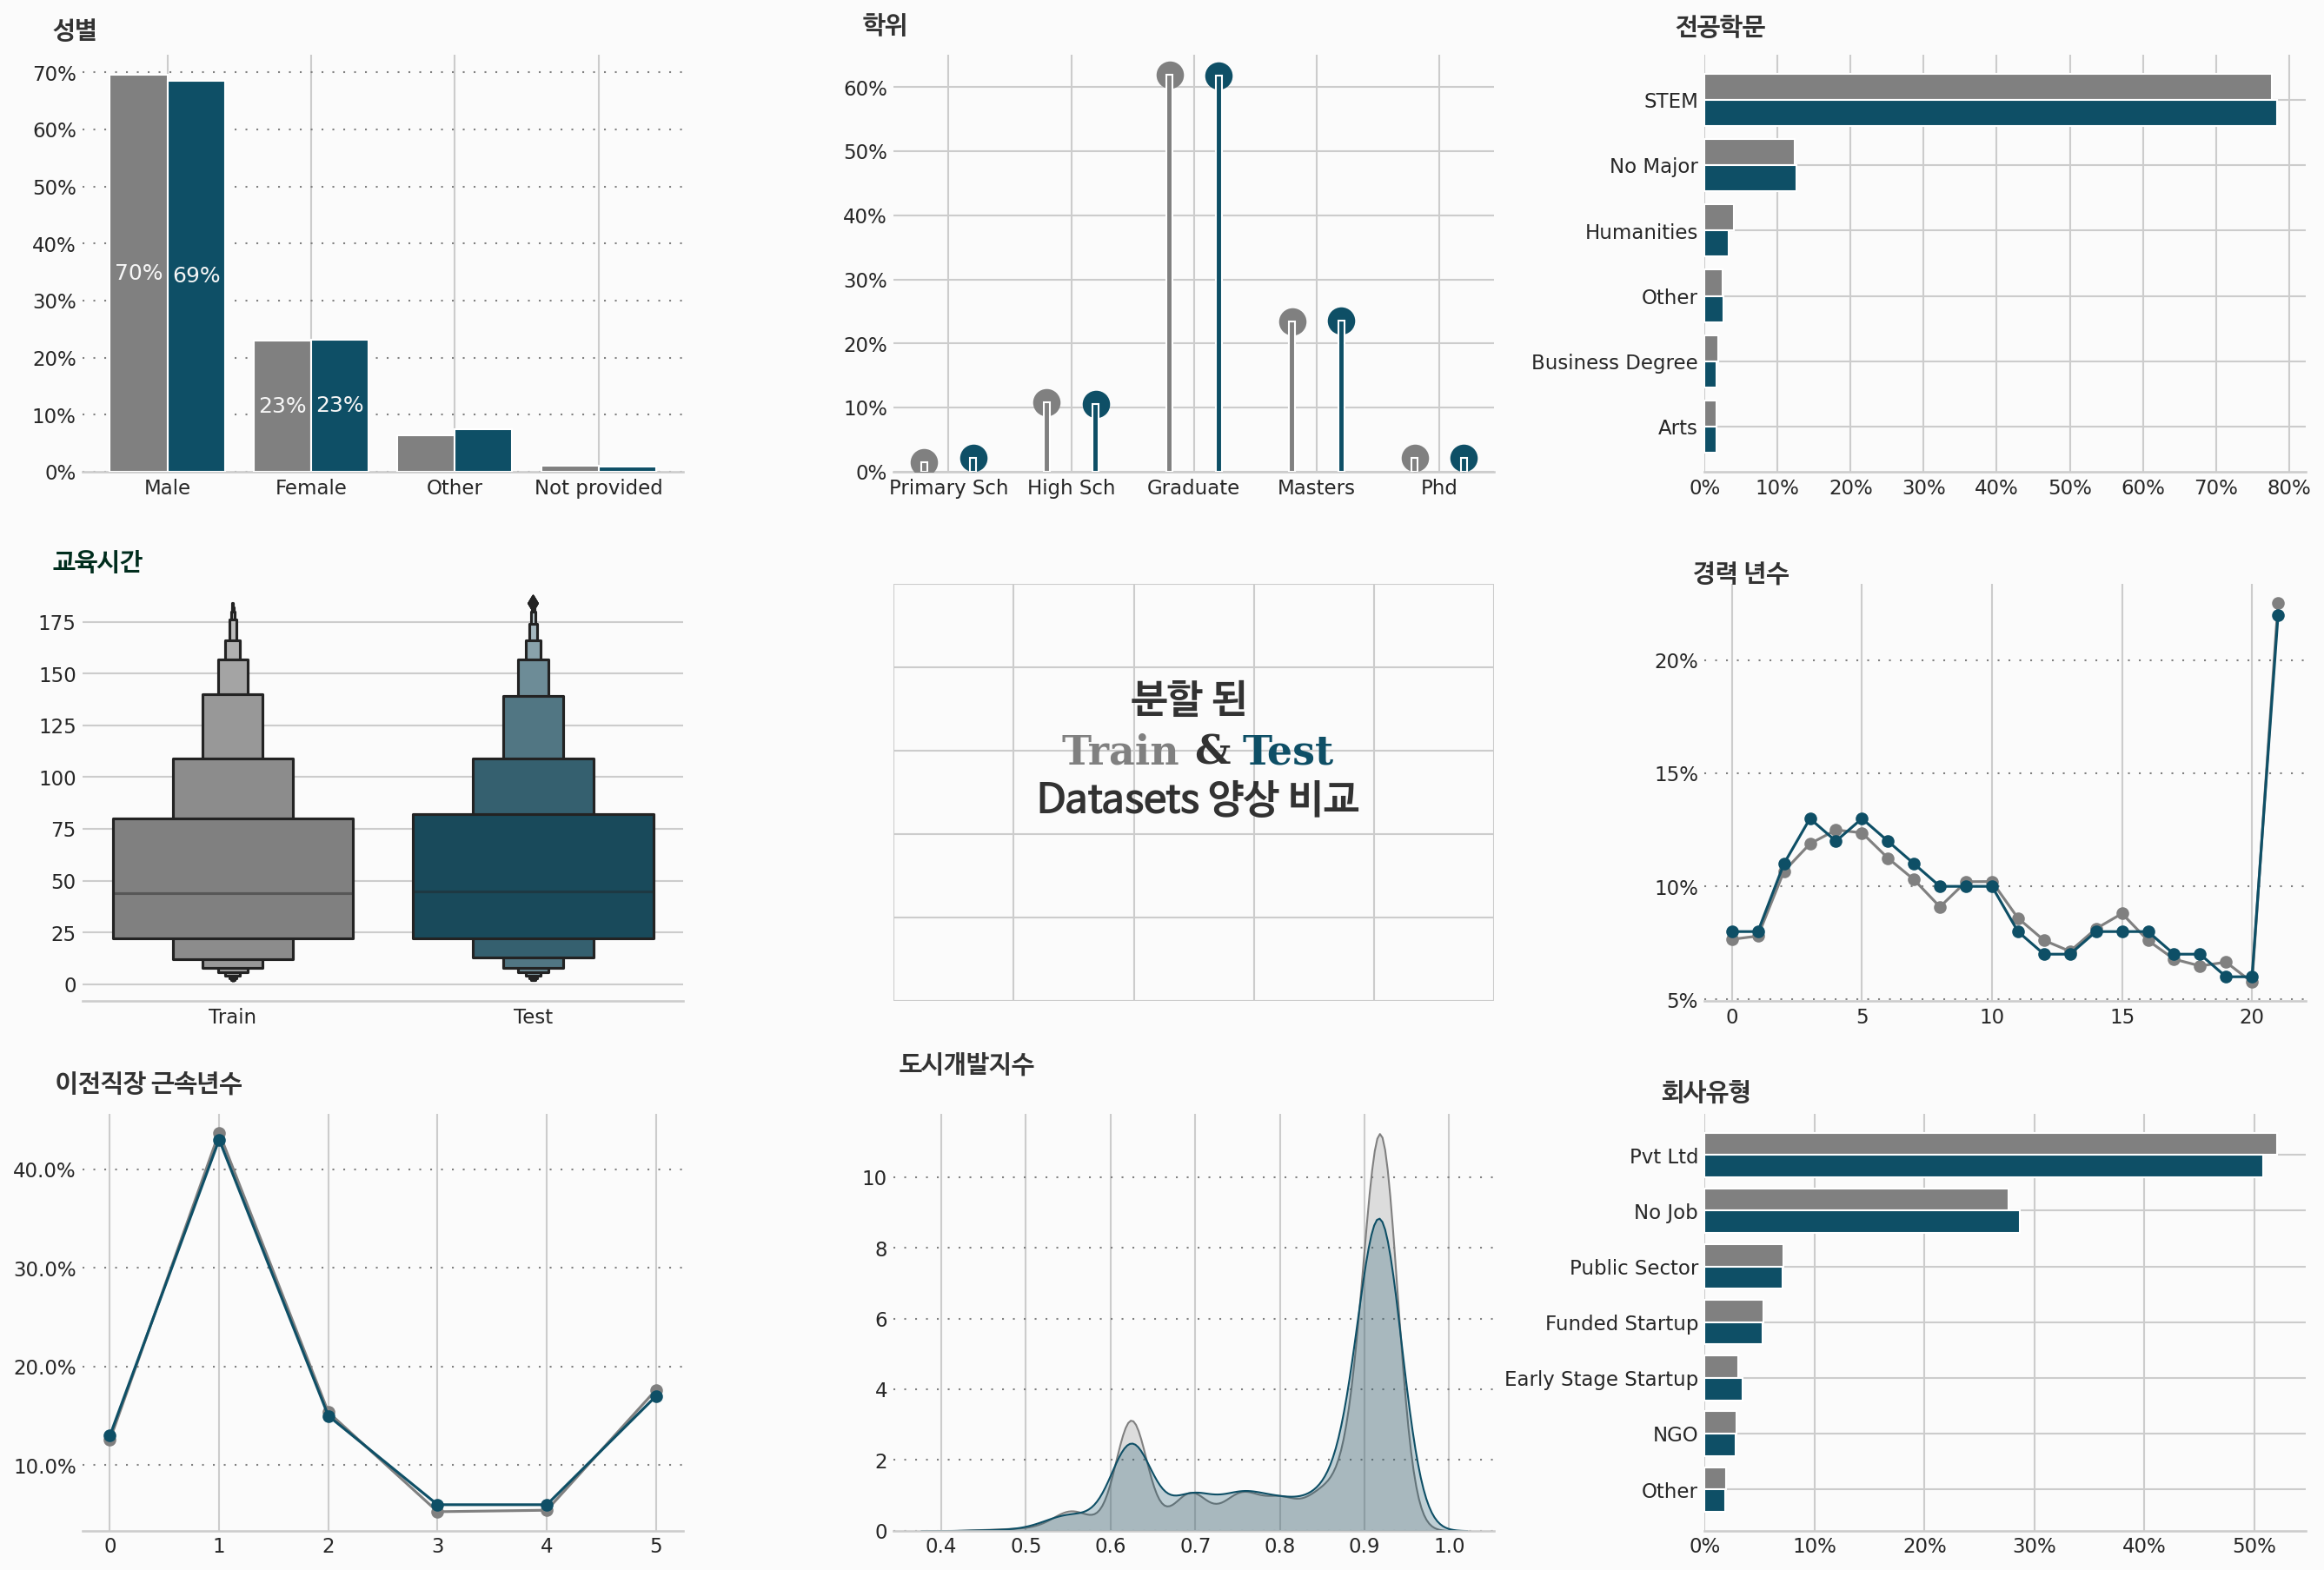

In [ ]:
# split한 train/test data set의 양상 비교
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])



# ax0 - gender 
train = pd.DataFrame(train_df["gender"].value_counts())
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Percentage"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax0.text(-0.6, 76, '성별', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax0.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['Male','Female','Other','Not provided'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# ax1 - education_level
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax1.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax1.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax1.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax1.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax1.text(-0.5, 68.5, '학위', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax1.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax1.set_xticklabels(['Primary Sch','High Sch', 'Graduate', 'Masters', 'Phd'])


# ax2 - major_discipline
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Percentage"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Percentage"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax2.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax2.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax2.text(-4, -0.8, '전공학문', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax2.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax2.set_yticklabels(list(test.index))
ax2.invert_yaxis()


# ax3 - training_hours
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Train"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Test"
ax3.text(-0.6, 200, '교육시간', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax3, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
ax3.set_xlabel("")
ax3.set_ylabel("")

# ax4 - sub_title
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, '분할 된 \n\n Datasets 양상 비교', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')


# ax5 - experience
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax5.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax5.text(-1.5, 18.5, '경력 년수', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax5.set_yticklabels(labels = ['0   ', '5%','10%','15%', '20%'])
ax5.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax5.yaxis.set_major_locator(mtick.MultipleLocator(5))


# ax6 - last_new_job
train = pd.DataFrame(train_df["last_new_job"].value_counts())
train["Percentage"] = train["last_new_job"].apply(lambda x: x/sum(train["last_new_job"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["last_new_job"].value_counts())
test["Percentage"] = round(test["last_new_job"].apply(lambda x: x/sum(test["last_new_job"])*100),).astype(int)
test = test.sort_index()
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax6.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax6.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax6.text(-0.5, 48, '이전직장 근속년수', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
ax6.yaxis.set_major_locator(mtick.MultipleLocator(10))


# ax7 - city_development_index
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax7,color="gray", shade=True, label="Train")
sns.kdeplot(test["city_development_index"], ax=ax7, color="#0e4f66", shade=True, label="Test")
ax7.text(0.35, 13, '도시개발지수', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax7.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax7.set_ylabel('')    
ax7.set_xlabel('')


# ax8 - company_type 
train = pd.DataFrame(train_df["company_type"].value_counts())
train["Percentage"] = train["company_type"].apply(lambda x: x/sum(train["company_type"])*100)
test = pd.DataFrame(test_df["company_type"].value_counts())
test["Percentage"] = test["company_type"].apply(lambda x: x/sum(test["company_type"])*100)

ax8.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax8.text(-4, -0.8, '회사유형', fontsize=14, fontweight='bold', fontfamily='NanumBarunGothic', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()


for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

>> ### **3.4_2 Sampling for Imbalanced Data**
- train set에 대하여 데이터 균형화 작업을 실시  
(증폭 후 train, test 분할 시 데이터 누수현상이 일어나므로, test set은 X y 각 한개씩만 운용)
- SMOTE, ADASYN, SMOTE-Tomek, SMOTE-ENN 네가지 방법 적용 

In [ ]:
# Basic
collections.Counter(y_train_basic)

Counter({0: 10246, 1: 3948})

In [ ]:
# SMOTE

smote = SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train_basic, y_train_basic)
collections.Counter(y_train_smote)

Counter({0: 10246, 1: 10246})

In [ ]:
# ADASYN

adasyn = ADASYN(random_state=2)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_basic, y_train_basic)
collections.Counter(y_train_adasyn)

Counter({0: 10246, 1: 10852})

In [ ]:
# SMOTE-Tomek

smoteto = SMOTETomek(random_state=2)
X_train_smoteto, y_train_smoteto = smoteto.fit_resample(X_train_basic, y_train_basic)
collections.Counter(y_train_smoteto)

Counter({0: 9903, 1: 9903})

In [ ]:
# SMOTE-ENN

smoteen = SMOTEENN(random_state=2)
X_train_smoteen, y_train_smoteen = smoteen.fit_resample(X_train_basic, y_train_basic)
collections.Counter(y_train_smoteen)

Counter({0: 4253, 1: 7039})

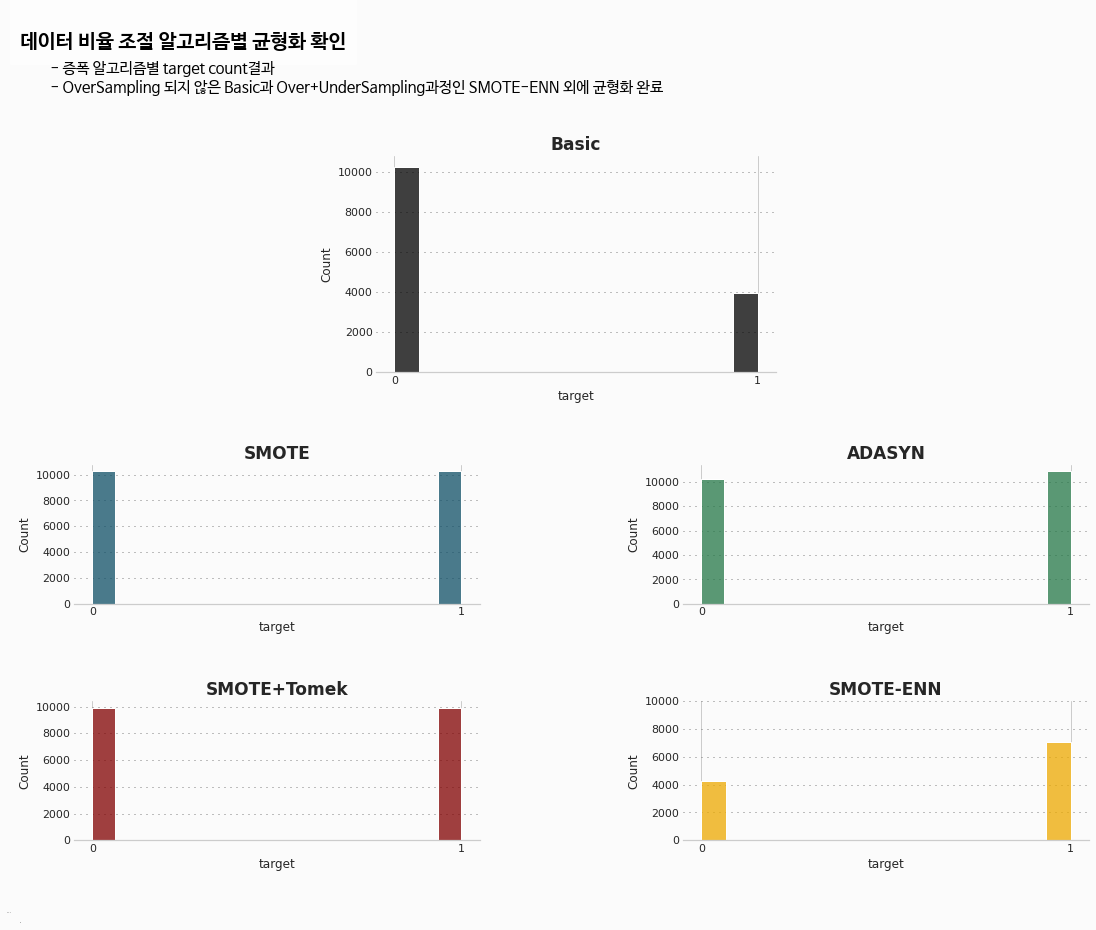

In [ ]:
set_dist = [y_train_basic, y_train_smote, y_train_smote, y_train_adasyn, y_train_smoteto, y_train_smoteen]
col_dist = ['black','#0e4f66','#0e4f66','#247747','maroon', '#EDA900']

fig, ax = plt.subplots(3,2, figsize=(15,10))
fig.patch.set_facecolor(background_color)

# left, bottom, width, height
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.99, 
                    top=0.95, wspace=0.5, hspace=0.7)

ax[0][0].set_position([0.33, 0.75, 0.37, 0.3])
ax[0][1].set_position([0, 0, 0, 0])

ax = ax.flatten()

for ind, set in enumerate(set_dist):
    sns.histplot(set, ax = ax[ind], color = col_dist[ind])
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

ax[0].set_title('Basic', weight='bold', fontsize = 17)
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_facecolor(background_color)
ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax[2].set_title('SMOTE', weight='bold', fontsize = 17)
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_facecolor(background_color)
ax[2].tick_params(axis=u'both', which=u'both',length=0)
ax[2].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax[3].set_title('ADASYN', weight='bold', fontsize = 17)
ax[3].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[3].set_facecolor(background_color)
ax[3].tick_params(axis=u'both', which=u'both',length=0)
ax[3].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax[4].set_title('SMOTE+Tomek', weight='bold', fontsize = 17)
ax[4].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[4].set_facecolor(background_color)
ax[4].tick_params(axis=u'both', which=u'both',length=0)
ax[4].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax[5].set_title('SMOTE-ENN', weight='bold', fontsize = 17)
ax[5].set_ylim(bottom = 0, top = 10000)
ax[5].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[5].set_facecolor(background_color)
ax[5].tick_params(axis=u'both', which=u'both',length=0)
ax[5].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(axis='both', which='major', labelsize=0.1)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')

        
fig.text(0, 1.2, '\n데이터 비율 조절 알고리즘별 균형화 확인',
        fontsize = 20, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

fig.text(0, 1.14, 
         '''
         - 증폭 알고리즘별 target count결과
         - OverSampling 되지 않은 Basic과 Over+UnderSampling과정인 SMOTE-ENN 외에 균형화 완료''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show()

#4. Modeling
- 기준모델을 설정하고, 생성한 데이터마다 Random Forest와 XGboost모델을 학습시켜 성능을 비교(10개 모델)
  - 4.1 Define Baseline Model
  - 4.2 Training Basic Data
  - 4.3 Training SMOTE Data
  - 4.4 Training ADASYN Data
  - 4.5 Training SMOTE-Tomek Data
  - 4.6 Training SMOTE-ENN Data
  - 4.7 Compare models
  - 4.8 BestModel Hyperparameter tuning



> ## 4.1 Define Baseline Model
- 기준모델 정의

In [ ]:
collections.Counter(y_test)

Counter({1: 987, 0: 2562})

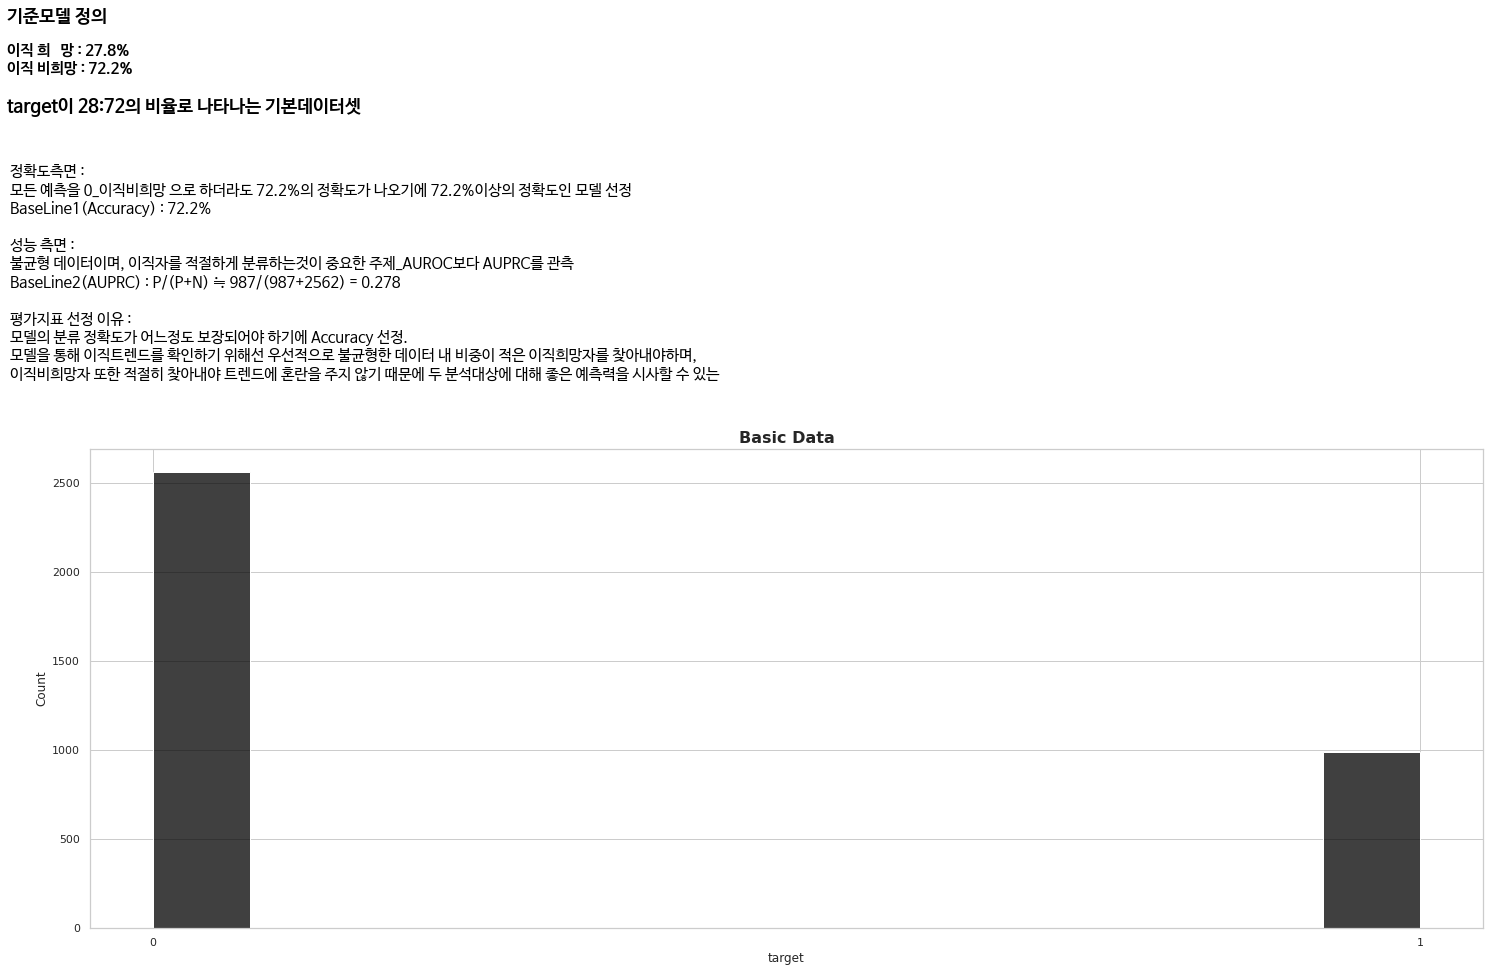

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(22, 18))
fig.subplots_adjust(left=0.06, bottom=-0.1, right=0.94, top=0.27, wspace=0.2)

plot = sns.histplot(y_test, color = 'black')
plot.set_title('Basic Data', weight='bold', size=16)
plot.xaxis.set_major_locator(MaxNLocator(integer=True))


fig.text(0.008, 0.6, '기준모델 정의', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.008, 0.53, 'target이 28:72의 비율로 나타나는 기본데이터셋', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.008, 0.56, 
         f'이직 희   망 : {round((y_test.value_counts()[1] / y_test.value_counts().sum()) * 100,1)}% \n이직 비희망 : {round((y_test.value_counts()[0] / y_test.value_counts().sum()) * 100,1)}%', 
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.01, 0.31, '''

정확도측면 :
모든 예측을 0_이직비희망 으로 하더라도 72.2%의 정확도가 나오기에 72.2%이상의 정확도인 모델 선정
BaseLine1(Accuracy) : 72.2%

성능 측면 : 
불균형 데이터이며, 이직자를 적절하게 분류하는것이 중요한 주제_AUROC보다 AUPRC를 관측
BaseLine2(AUPRC) : P/(P+N) ≒ 987/(987+2562) = 0.278

평가지표 선정 이유 :
모델의 분류 정확도가 어느정도 보장되어야 하기에 Accuracy 선정.
모델을 통해 이직트렌드를 확인하기 위해선 우선적으로 불균형한 데이터 내 비중이 적은 이직희망자를 찾아내야하며, 
이직비희망자 또한 적절히 찾아내야 트렌드에 혼란을 주지 않기 때문에 두 분석대상에 대해 좋은 예측력을 시사할 수 있는
''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

> ## 4.2 Training Basic Data
- 불균형이 존재하는 Basic Data활용
  - 4.2_1 Random Forest Model 설계
  - 4.2_2 XGboost Model 설계

>> ### **4.2_1 Random Forest Model 설계**





In [ ]:
# Random Forest /  Basic Data

RF_Basic_model = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
RF_Basic_model.fit(X_train_basic,y_train_basic)
rfc_prediction = RF_Basic_model.predict(X_test)
rfc_prediction_proba = RF_Basic_model.predict_proba(X_test)[:,1]
cm_rfc_basic = confusion_matrix(y_test, rfc_prediction)
Basic_rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                                  precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                                  roc_auc_score(y_test, rfc_prediction_proba), average_precision_score(y_test, rfc_prediction_proba)], 
                            columns=['Basic Data Random Forest Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
Basic_rfc_df 

Basic Data Random Forest Score
Accuracy                             0.726272
Recall                               0.498028
Precision                            0.509586
F1-score                             0.503741
ROC AUC Score                        0.640261
AUPRC                                0.403971

>> ### **4.2_2 XGBoost Model 설계**

In [ ]:
# XGBoost / Basic Data

XGB_Basic_model = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
XGB_Basic_model.fit(X_train_basic,y_train_basic)
xgb_prediction = XGB_Basic_model.predict(X_test)
xgb_prediction_proba = XGB_Basic_model.predict_proba(X_test)[:,1]
cm_xgb_basic = confusion_matrix(y_test, xgb_prediction)
Basic_xgb_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction_proba), average_precision_score(y_test, xgb_prediction_proba)], 
                            columns=['Basic Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
Basic_xgb_df 

Basic Data XGBoost Score
Accuracy                       0.727098
Recall                         0.473373
Precision                      0.511727
F1-score                       0.491803
ROC AUC Score                  0.660318
AUPRC                          0.417758

> ## 4.3 Training SMOTE Data
- SMOTE를 통해 불균형을 해소한 Data활용
  - 4.2_1 Random Forest Model 설계
  - 4.2_2 XGboost Model 설계

>> ### **4.3_1 Random Forest Model 설계**

In [ ]:
# Random Forest / SMOTE Data

RF_SMOTE_model = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
RF_SMOTE_model.fit(X_train_smote,y_train_smote)
rfc_prediction = RF_SMOTE_model.predict(X_test)
rfc_prediction_proba = RF_SMOTE_model.predict_proba(X_test)[:,1]
cm_rfc_smote = confusion_matrix(y_test, rfc_prediction)
SMOTE_rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                                  precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                                  roc_auc_score(y_test, rfc_prediction_proba), average_precision_score(y_test, rfc_prediction_proba)], 
                            columns=['SMOTE Data Random Forest Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTE_rfc_df 

SMOTE Data Random Forest Score
Accuracy                             0.755983
Recall                               0.753452
Precision                            0.545325
F1-score                             0.632712
ROC AUC Score                        0.806342
AUPRC                                0.588447

>> ### **4.3_2 XGBoost Model 설계**

In [ ]:
# XGBoost / SMOTE Data

XGB_SMOTE_model = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
XGB_SMOTE_model.fit(X_train_smote,y_train_smote)
xgb_prediction = XGB_SMOTE_model.predict(X_test)
xgb_prediction_proba = XGB_SMOTE_model.predict_proba(X_test)[:,1]
cm_xgb_smote = confusion_matrix(y_test, xgb_prediction)
SMOTE_xgb_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction_proba), average_precision_score(y_test, xgb_prediction_proba)], 
                            columns=['SMOTE Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTE_xgb_df 

SMOTE Data XGBoost Score
Accuracy                       0.753783
Recall                         0.745562
Precision                      0.542714
F1-score                       0.628168
ROC AUC Score                  0.794788
AUPRC                          0.549121

> ## 4.4 Training ADASYN Data
- ADASYN을 통해 불균형을 해소한 Data활용
  - 4.2_1 Random Forest Model 설계
  - 4.2_2 XGboost Model 설계

>> ### **4.4_1 Random Forest Model 설계**

In [ ]:
# Random Forest / ADASYN Data

RF_ADASYN_model = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
RF_ADASYN_model.fit(X_train_adasyn,y_train_adasyn)
rfc_prediction = RF_ADASYN_model.predict(X_test)
rfc_prediction_proba = RF_ADASYN_model.predict_proba(X_test)[:,1]
cm_rfc_adasyn = confusion_matrix(y_test, rfc_prediction)
ADASYN_rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                                  precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                                  roc_auc_score(y_test, rfc_prediction_proba), average_precision_score(y_test, rfc_prediction_proba)], 
                            columns=['ADASYN Data Random Forest Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
ADASYN_rfc_df 

ADASYN Data Random Forest Score
Accuracy                              0.755708
Recall                                0.743590
Precision                             0.545586
F1-score                              0.629382
ROC AUC Score                         0.804133
AUPRC                                 0.584010

>> ### **4.4_2 XGBoost Model 설계**

In [ ]:
# XGBoost / ASASYN Data

XGB_ADASYN_model = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
XGB_ADASYN_model.fit(X_train_adasyn,y_train_adasyn)
xgb_prediction = XGB_ADASYN_model.predict(X_test)
xgb_prediction_proba = XGB_ADASYN_model.predict_proba(X_test)[:,1]
cm_xgb_adasyn = confusion_matrix(y_test, xgb_prediction)
ADASYN_xgb_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction_proba), average_precision_score(y_test, xgb_prediction_proba)], 
                            columns=['ADASYN Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
ADASYN_xgb_df 

ADASYN Data XGBoost Score
Accuracy                        0.742228
Recall                          0.750493
Precision                       0.526644
F1-score                        0.618951
ROC AUC Score                   0.781857
AUPRC                           0.518812

> ## 4.5 Training SMOTE-Tomek Data
- SMOTE-Tomek을 통해 불균형을 해소한 Data활용
  - 4.2_1 Random Forest Model 설계
  - 4.2_2 XGboost Model 설계

>> ### **4.5_1 Random Forest Model 설계**

In [ ]:
# Random Forest / SMOTE-Tomek Data

RF_SMOTETO_model = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
RF_SMOTETO_model.fit(X_train_smoteto,y_train_smoteto)
rfc_prediction = RF_SMOTETO_model.predict(X_test)
rfc_prediction_proba = RF_SMOTETO_model.predict_proba(X_test)[:,1]
cm_rfc_smotomek = confusion_matrix(y_test, rfc_prediction)
SMOTETO_rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                                  precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                                  roc_auc_score(y_test, rfc_prediction_proba), average_precision_score(y_test, rfc_prediction_proba)], 
                            columns=['SMOTE-Tomek Data Random Forest Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTETO_rfc_df 

SMOTE-Tomek Data Random Forest Score
Accuracy                                   0.743054
Recall                                     0.720907
Precision                                  0.528944
F1-score                                   0.610184
ROC AUC Score                              0.780394
AUPRC                                      0.536948

>> ### **4.5_2 XGBoost Model 설계**

In [ ]:
# XGBoost / SMOTE-Tomek Data

XGB_SMOTETO_model = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
XGB_SMOTETO_model.fit(X_train_smoteto,y_train_smoteto)
xgb_prediction = XGB_SMOTETO_model.predict(X_test)
xgb_prediction_proba = XGB_SMOTETO_model.predict_proba(X_test)[:,1]
cm_xgb_smotomek = confusion_matrix(y_test, xgb_prediction)
SMOTETO_xgb_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction_proba), average_precision_score(y_test, xgb_prediction_proba)], 
                            columns=['SMOTE-Tomek Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTETO_xgb_df 

SMOTE-Tomek Data XGBoost Score
Accuracy                             0.739477
Recall                               0.687377
Precision                            0.525245
F1-score                             0.595472
ROC AUC Score                        0.767472
AUPRC                                0.524197

> ## 4.6 Training SMOTE-ENN Data
- SMOTE-ENN 통해 불균형을 해소한 Data활용
  - 4.2_1 Random Forest Model 설계
  - 4.2_2 XGboost Model 설계

>> ### **4.6_1 Random Forest Model 설계**

In [ ]:
# Random Forest / SMOTE-ENN Data

RF_SMOTEEN_model = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
RF_SMOTEEN_model.fit(X_train_smoteen,y_train_smoteen)
rfc_prediction = RF_SMOTEEN_model.predict(X_test)
rfc_prediction_proba = RF_SMOTEEN_model.predict_proba(X_test)[:,1]
cm_rfc_smotenn = confusion_matrix(y_test, rfc_prediction)
SMOTEEN_rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                                  precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                                  roc_auc_score(y_test, rfc_prediction_proba), average_precision_score(y_test, rfc_prediction_proba)], 
                            columns=['SMOTE-ENN Data Random Forest Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTEEN_rfc_df 

SMOTE-ENN Data Random Forest Score
Accuracy                                 0.726547
Recall                                   0.749507
Precision                                0.506667
F1-score                                 0.604614
ROC AUC Score                            0.790133
AUPRC                                    0.566078

>> ### **4.6_2 XGBoost Model 설계**

In [ ]:
# XGBoost / SMOTE-ENN Data

XGB_SMOTEEN_mode = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
XGB_SMOTEEN_model.fit(X_train_smoteen,y_train_smoteen)
xgb_prediction = XGB_SMOTEEN_model.predict(X_test)
xgb_prediction_proba = XGB_SMOTEEN_model.predict_proba(X_test)[:,1]
cm_xgb_smotenn = confusion_matrix(y_test, xgb_prediction)
SMOTEEN_xgb_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction_proba), average_precision_score(y_test, xgb_prediction_proba)], 
                            columns=['SMOTE-ENN Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTEEN_xgb_df

SMOTE-ENN Data XGBoost Score
Accuracy                           0.728748
Recall                             0.605523
Precision                          0.511667
F1-score                           0.554652
ROC AUC Score                      0.736068
AUPRC                              0.451755

> ## 4.7 Compare models
- 평가지표를 활용하여 모델 비교 및 동일조건 내 Best Model 찾기

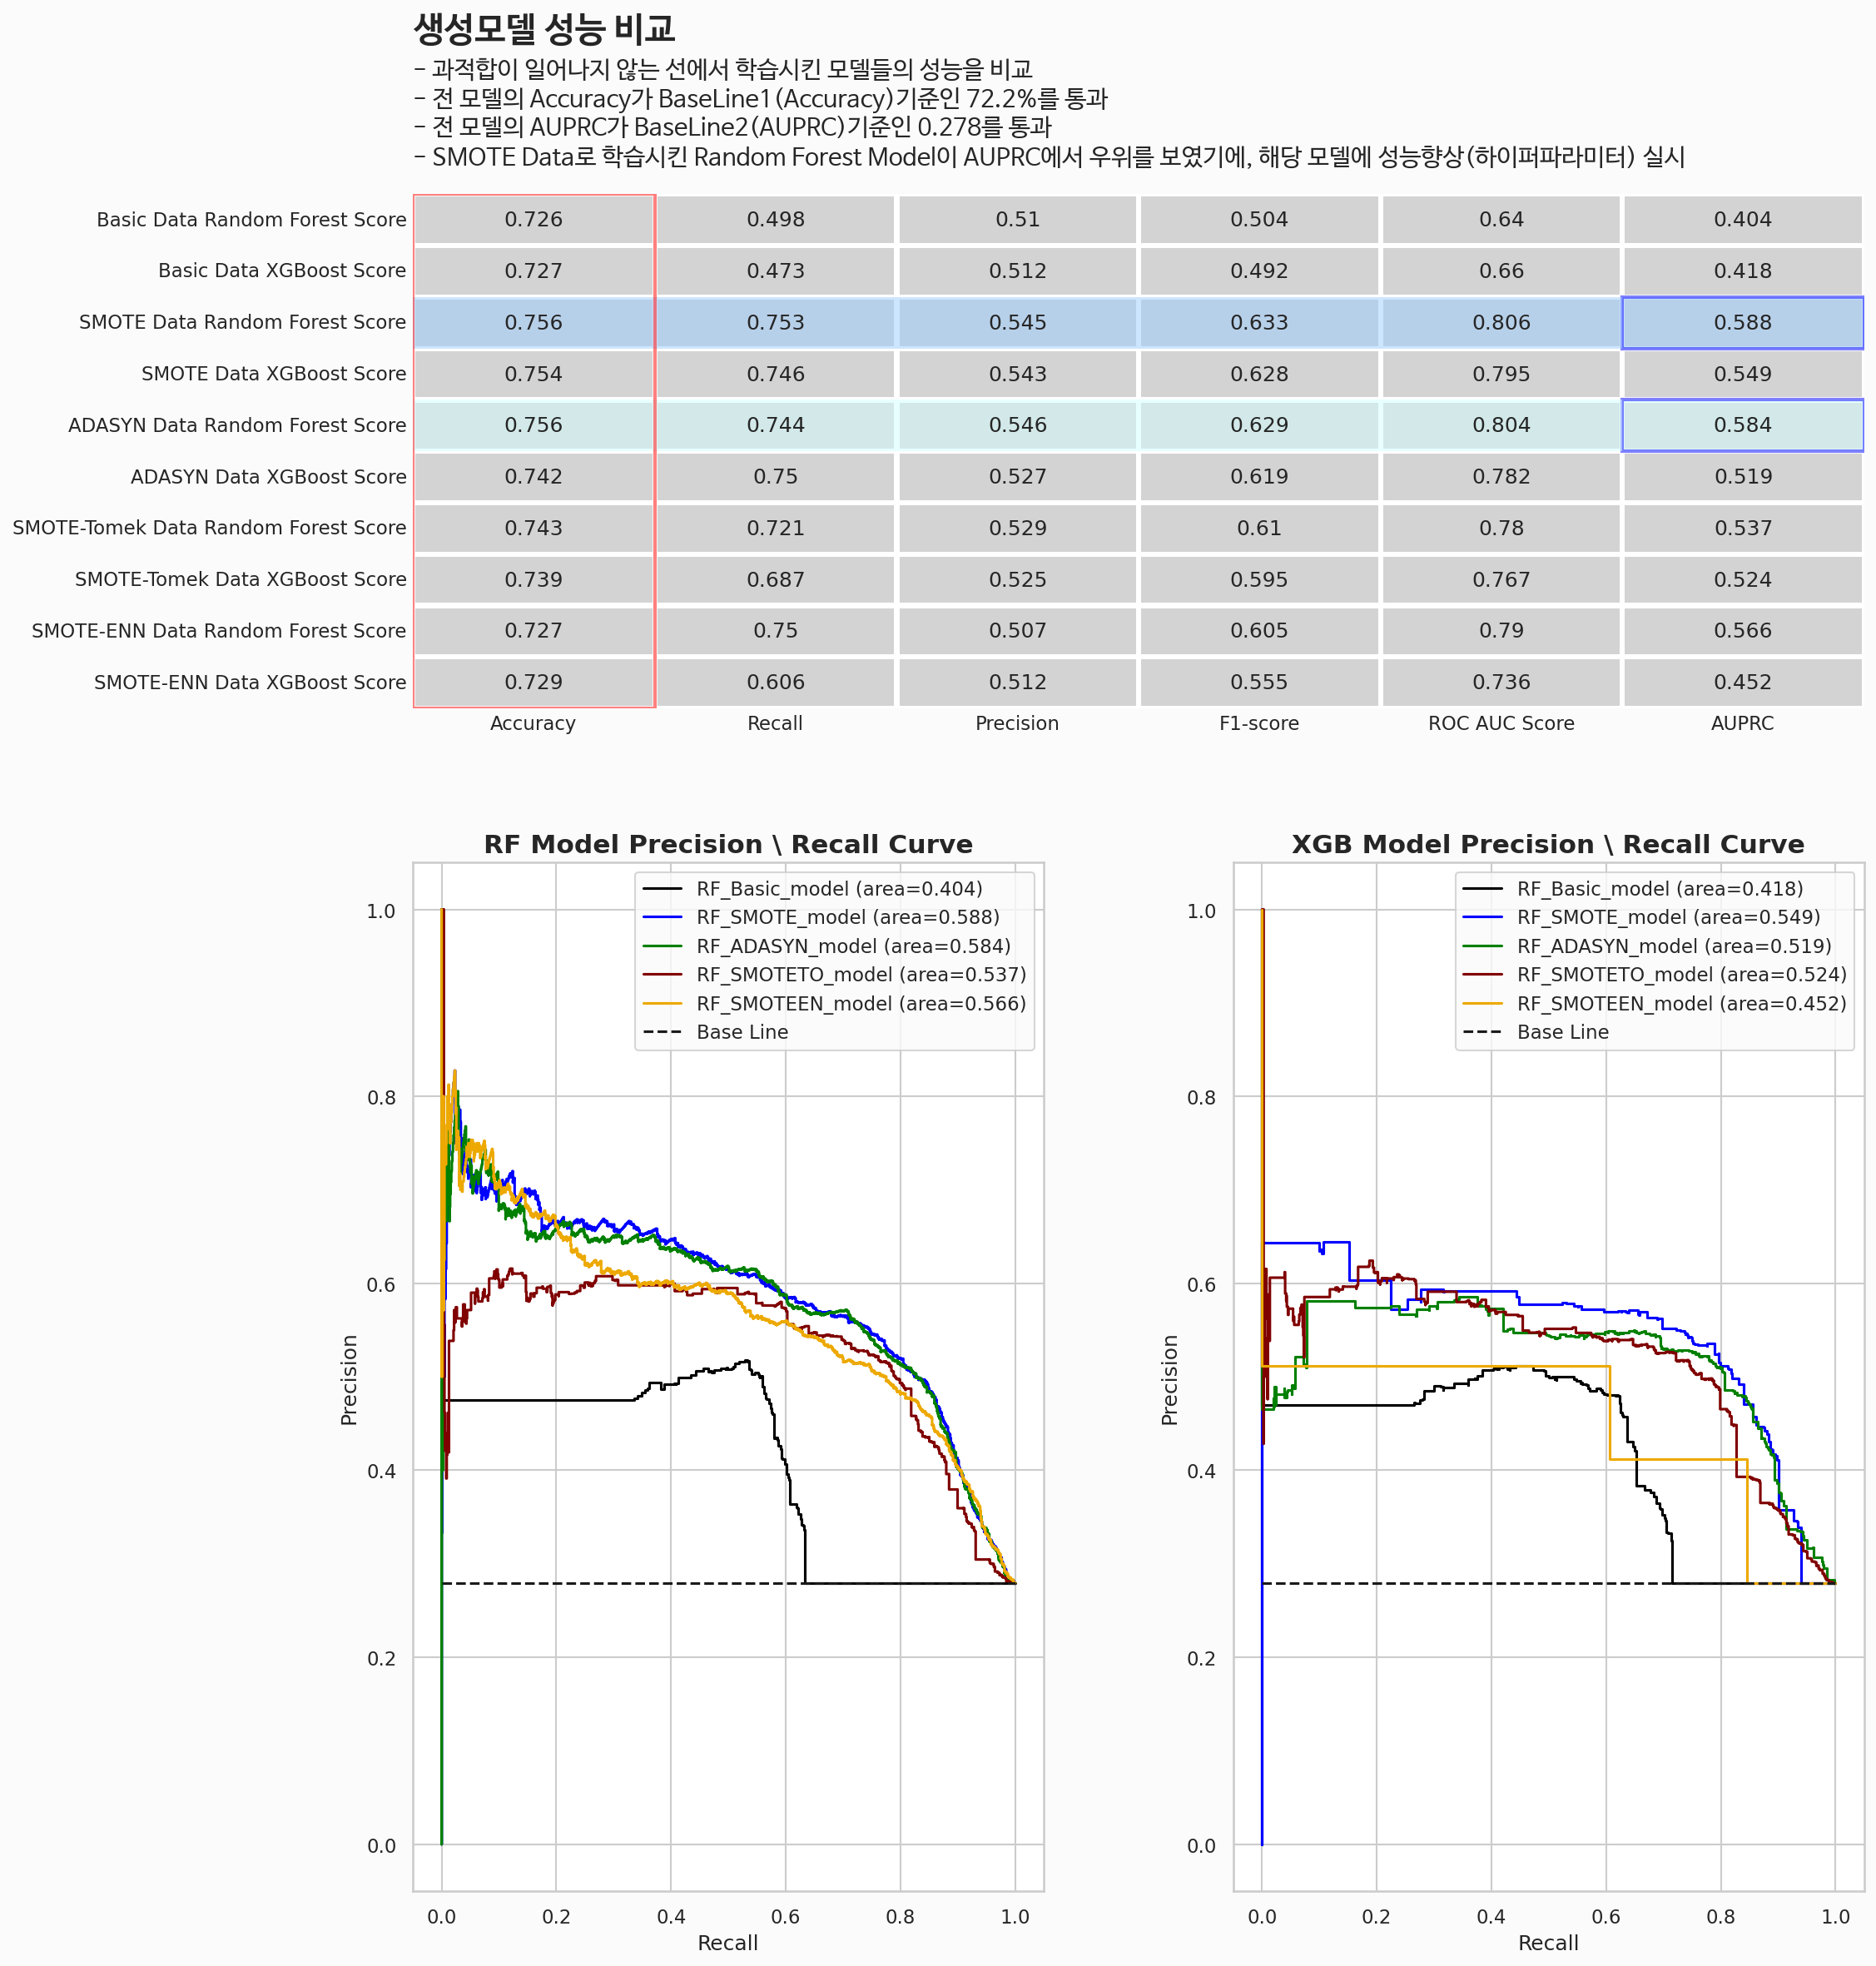

In [ ]:
fig = plt.figure(figsize=(15,18), dpi=150)
gs = gridspec.GridSpec(nrows = 2, ncols = 2, height_ratios = [1, 2])
gs.update(wspace=0.3, hspace=0.2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

ax1.figsize=(20, 50)

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# 배경변경
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

# 모든 모델 도표 나열
df_models = round(pd.concat([Basic_rfc_df, Basic_xgb_df, 
                             SMOTE_rfc_df, SMOTE_xgb_df, 
                             ADASYN_rfc_df, ADASYN_xgb_df, 
                             SMOTETO_rfc_df, SMOTETO_xgb_df, 
                             SMOTEEN_rfc_df, SMOTEEN_xgb_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".3", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-3,'생성모델 성능 비교',fontfamily='NanumBarunGothic',fontsize=20,fontweight='bold')
ax0.text(0,-0.05,'''
- 과적합이 일어나지 않는 선에서 학습시킨 모델들의 성능을 비교
- 전 모델의 Accuracy가 BaseLine1(Accuracy)기준인 72.2%를 통과
- 전 모델의 AUPRC가 BaseLine2(AUPRC)기준인 0.278를 통과
- SMOTE Data로 학습시킨 Random Forest Model이 AUPRC에서 우위를 보였기에, 해당 모델에 성능향상(하이퍼파라미터) 실시
''',fontfamily='NanumBarunGothic',fontsize=14)

ax0.add_patch(Rectangle((5, 2), 1, 1, fill=True, facecolor='#9DCFFF', edgecolor='blue', linewidth=2, alpha=0.5))
ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True, color='#9DCFFF', edgecolor='white', linewidth=0, alpha=0.5))

ax0.add_patch(Rectangle((5, 4), 1, 1, fill=True, facecolor='#D3FFFF', edgecolor='blue', linewidth=2, alpha=0.5))
ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True, color='#D3FFFF', edgecolor='white', linewidth=0, alpha=0.5))

ax0.add_patch(Rectangle((0,0), 1, 10, fill=False, edgecolor='red', linewidth=2, alpha=0.5))

# PR AUC def
def mk_vis_df(model_list, model_name, ax):
  recall1 = []
  precision1 = []
  average_precision1=[]
  for model in model_list :

      y_score = model.predict_proba(X_test)[:,1]

      precision = dict()
      recall = dict()
      average_precision = dict()

      n_classes = 2

      for i in range(n_classes):
          precision[i], recall[i], _ = precision_recall_curve(y_test, y_score)
          average_precision[i] = average_precision_score(y_test, y_score)

      # micro-average: 클래스의 점수를 정량화
      precision["micro"], recall["micro"], _ = precision_recall_curve(
          y_test.ravel(), y_score.ravel()
          )
      average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")


      recall1.append(recall["micro"])
      precision1.append(precision["micro"])
      average_precision1.append(average_precision["micro"])

  # 도표 세부사항
  colors = ['black','blue','green','maroon', '#EDA900']

  for i, color in zip(range(len(model_list)), colors):
    display = PrecisionRecallDisplay(
        recall=recall1[i],
        precision=precision1[i],
        average_precision=average_precision1[i],
        )
    lab = f"{RF_model_name[i]} (area=%.3f)" % (average_precision1[i])
    display.plot(ax=ax, label = lab, color=color) 

  base_rate = y_test.mean()
  base_line, = ax.plot([0,1],[base_rate,base_rate],'k--')

  handles, labels = display.ax_.get_legend_handles_labels()
  handles.extend([base_line])
  labels.extend(["Base Line"])

  ax.legend(handles=handles, labels=labels, loc="best", facecolor = "#fbfbfb")

  

# PR AUC RF_model
RF_model_list = [RF_Basic_model, RF_SMOTE_model,  
              RF_ADASYN_model, RF_SMOTETO_model,
              RF_SMOTEEN_model
              ]
RF_model_name = ['RF_Basic_model', 'RF_SMOTE_model',  
              'RF_ADASYN_model', 'RF_SMOTETO_model',
              'RF_SMOTEEN_model'
              ]

mk_vis_df(RF_model_list,RF_model_name, ax1)
ax1.set_title('RF Model Precision \ Recall Curve',fontsize=15,fontweight="bold")

# PR XGB RF_model
XGB_model_list = [XGB_Basic_model, XGB_SMOTE_model, 
                  XGB_ADASYN_model, XGB_SMOTETO_model,
                  XGB_SMOTEEN_model]
XGB_model_name = ['XGB_Basic_model', 'XGB_SMOTE_model', 
                  'XGB_ADASYN_model', 'XGB_SMOTETO_model',
                  'XGB_SMOTEEN_model']

mk_vis_df(XGB_model_list,XGB_model_name, ax2)
ax2.set_title('XGB Model Precision \ Recall Curve',fontsize=15,fontweight="bold")

plt.show()

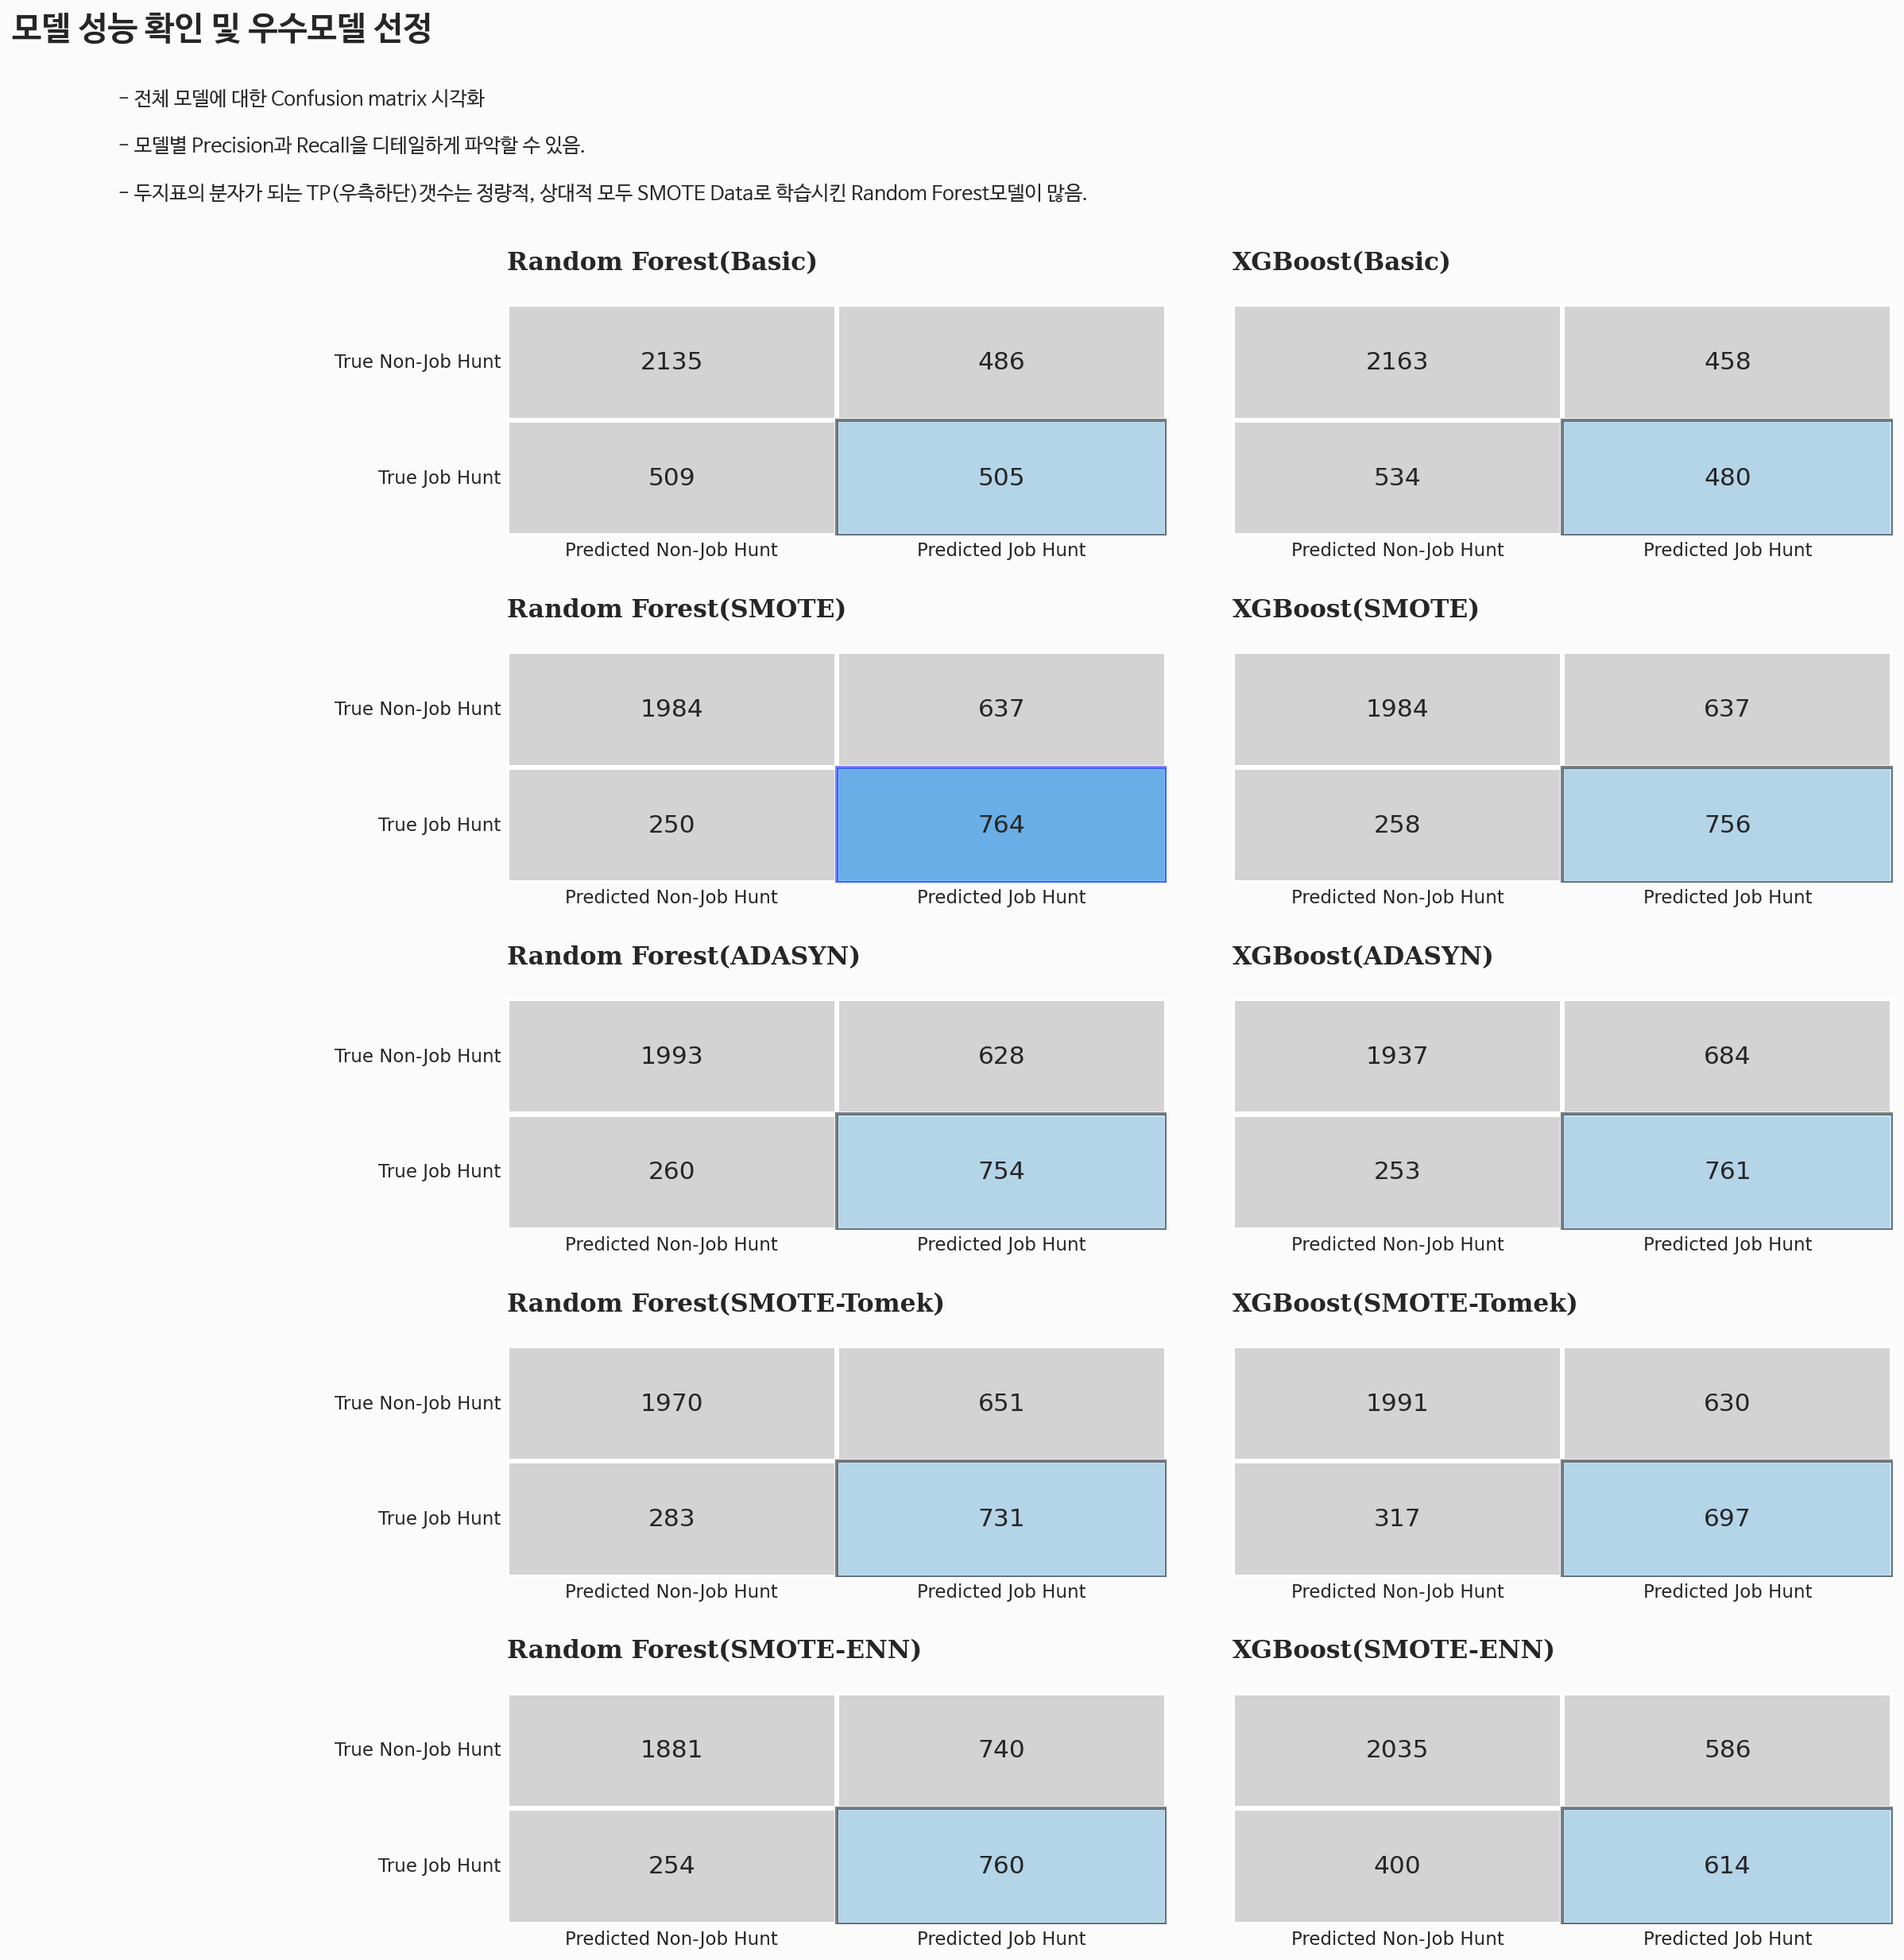

In [ ]:
colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

# Insight
ax0.text(-1.5,-2.3,'모델 성능 확인 및 우수모델 선정',fontfamily='NanumBarunGothic',fontsize=20,fontweight='bold')
ax0.text(-1.3,-0.5,
         '''
         - 전체 모델에 대한 Confusion matrix 시각화

         - 모델별 Precision과 Recall을 디테일하게 파악할 수 있음.
         
         - 두지표의 분자가 되는 TP(우측하단)갯수는 정량적, 상대적 모두 SMOTE Data로 학습시킨 Random Forest모델이 많음.

         '''
         ,fontfamily='NanumBarunGothic',fontsize=12
         )

# Random Forest(Basic)
sns.heatmap(cm_rfc_basic, linewidths=2.5,yticklabels=['True Non-Job Hunt','True Job Hunt'],xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax0,annot_kws={"fontsize":15})

# XGBoost(Basic)
sns.heatmap(cm_xgb_basic, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# Random Forest(SMOTE)
sns.heatmap(cm_rfc_smote, linewidths=2.5,yticklabels=['True Non-Job Hunt','True Job Hunt'],xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# XGBoost(SMOTE)
sns.heatmap(cm_xgb_smote, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# Random Forest(ADASYN)
sns.heatmap(cm_rfc_adasyn, linewidths=2.5,yticklabels=['True Non-Job Hunt','True Job Hunt'],xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# XGBoost(ADASYN)
sns.heatmap(cm_xgb_adasyn, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax5,annot_kws={"fontsize":15})

# Random Forest(SMOTE-Tomek)
sns.heatmap(cm_rfc_smotomek, linewidths=2.5,yticklabels=['True Non-Job Hunt','True Job Hunt'],xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax6,annot_kws={"fontsize":15})

# XGBoost(SMOTE-Tomek)
sns.heatmap(cm_xgb_smotomek, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax7,annot_kws={"fontsize":15})

# Random Forest(SMOTE-ENN)
sns.heatmap(cm_rfc_smotenn, linewidths=2.5,yticklabels=['True Non-Job Hunt','True Job Hunt'],xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax8,annot_kws={"fontsize":15})

# XGBoost(SMOTE-ENN)
sns.heatmap(cm_xgb_smotenn, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Hunt','Predicted Job Hunt'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax9,annot_kws={"fontsize":15})

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.text(0, -0.3, 'Random Forest(Basic)',fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(0, -0.3, 'XGBoost(Basic)', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Random Forest(SMOTE)',fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'XGBoost(SMOTE)', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'Random Forest(ADASYN)',fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.3, 'XGBoost(ADASYN)',fontsize=15, fontweight='bold', fontfamily='serif')
ax6.text(0, -0.3, 'Random Forest(SMOTE-Tomek)', fontsize=15, fontweight='bold', fontfamily='serif')
ax7.text(0, -0.3, 'XGBoost(SMOTE-Tomek)',fontsize=15, fontweight='bold', fontfamily='serif')
ax8.text(0, -0.3, 'Random Forest(SMOTE-ENN)', fontsize=15, fontweight='bold', fontfamily='serif')
ax9.text(0, -0.3, 'XGBoost(SMOTE-ENN)',fontsize=15, fontweight='bold', fontfamily='serif')


colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,10):
  locals()["ax"+str(i)].set_facecolor(background_color) 
  locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
  if i == 2 :
    locals()["ax"+str(i)].add_patch(Rectangle((1, 1), 1, 1, fill=True, facecolor='#008bfb', edgecolor='blue', linewidth=2, alpha=0.5))
  else :
    locals()["ax"+str(i)].add_patch(Rectangle((1, 1), 1, 1, fill=True, facecolor='#97d5fe', edgecolor='black', linewidth=2, alpha=0.5))

for s in ["top","right","left"]:
    for i in range(0,10):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

> ## 4.8 BestModel Hyperparameter tuning
- SMOTE Data를 활용해 학습시킨 Random Forest 모델
  - 4.8_1 Best Params 찾기
  - 4.8_2 Hyper Parameter 설정 전후 AUPRC 비교


>> ### **4.8_1 Best Params 찾기**

In [ ]:
RF = RandomForestClassifier(random_state=2)
RF.fit(X_train_smote, y_train_smote)
RF_prediction = RF.predict(X_test)
RF_prediction_proba = RF.predict_proba(X_test)[:,1]

dists = {
    'verbose': [0], # 동작 메시지를 프린트하지 않음
    'n_estimators': randint(100,500), # 모델 객체 지정
    'max_depth': randint(2,20), # 트리의 최대 깊이
    'min_samples_split' : randint(2,10), # 노드 분할시 최소 샘플 수   
    'min_samples_leaf' : randint(1,10), # 리프 노드의 최소 샘플 수
    'max_features': randint(2,25), # 각 노드에서 분할시 선택할 특성의 수
    'max_leaf_nodes' : randint(2,20), # 리프 노드의 최대 수
    }

fit_dists = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 50,
              'eval_set': [(X_test, RF_prediction)]}

rs_RF = RandomizedSearchCV(RF, dists, n_iter=10, # n_iter : 파라미터 검색 횟수
                            n_jobs=-1, verbose=2, cv=10, # cv : 교차검증 시 fold 갯수
                            scoring='roc_auc', refit=True, random_state=2)

In [ ]:
# Find Best Parameters

rs_RF.fit(X_train_smote, y_train_smote)
best_score = rs_RF.best_score_
best_params = rs_RF.best_params_
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best params: 
max_depth: 11
max_features: 11
max_leaf_nodes: 16
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 143
verbose: 0


In [ ]:
SMOTE_RF_hyp = RandomForestClassifier(**best_params, random_state=2, n_jobs = -1)
SMOTE_RF_hyp.fit(X_train_smote, y_train_smote)
RF_hyp_prediction = SMOTE_RF_hyp.predict(X_test)
RF_hyp_prediction_proba = SMOTE_RF_hyp.predict_proba(X_test)[:,1]
cm_SMOTE_RF_hyp = confusion_matrix(y_test, RF_hyp_prediction)
SMOTE_RF_hyp_df = pd.DataFrame(data=[accuracy_score(y_test, RF_prediction), recall_score(y_test, RF_prediction), # RF_prediction > RF_hyp_prediction
                                  precision_score(y_test, RF_prediction),  f1_score(y_test, RF_prediction),
                                  roc_auc_score(y_test, RF_hyp_prediction_proba), average_precision_score(y_test, RF_hyp_prediction_proba)], # RF_prediction_proba > RF_hyp_prediction_proba
                            columns=['SMOTE Data Hyper RF Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score", "AUPRC"])
SMOTE_RF_hyp_df

SMOTE Data Hyper RF Score
Accuracy                        0.762311
Recall                          0.599606
Precision                       0.570356
F1-score                        0.584615
ROC AUC Score                   0.807037
AUPRC                           0.590659

>> ### **4.8_2 Hyper Parameter 설정 전후 AUPRC 비교**

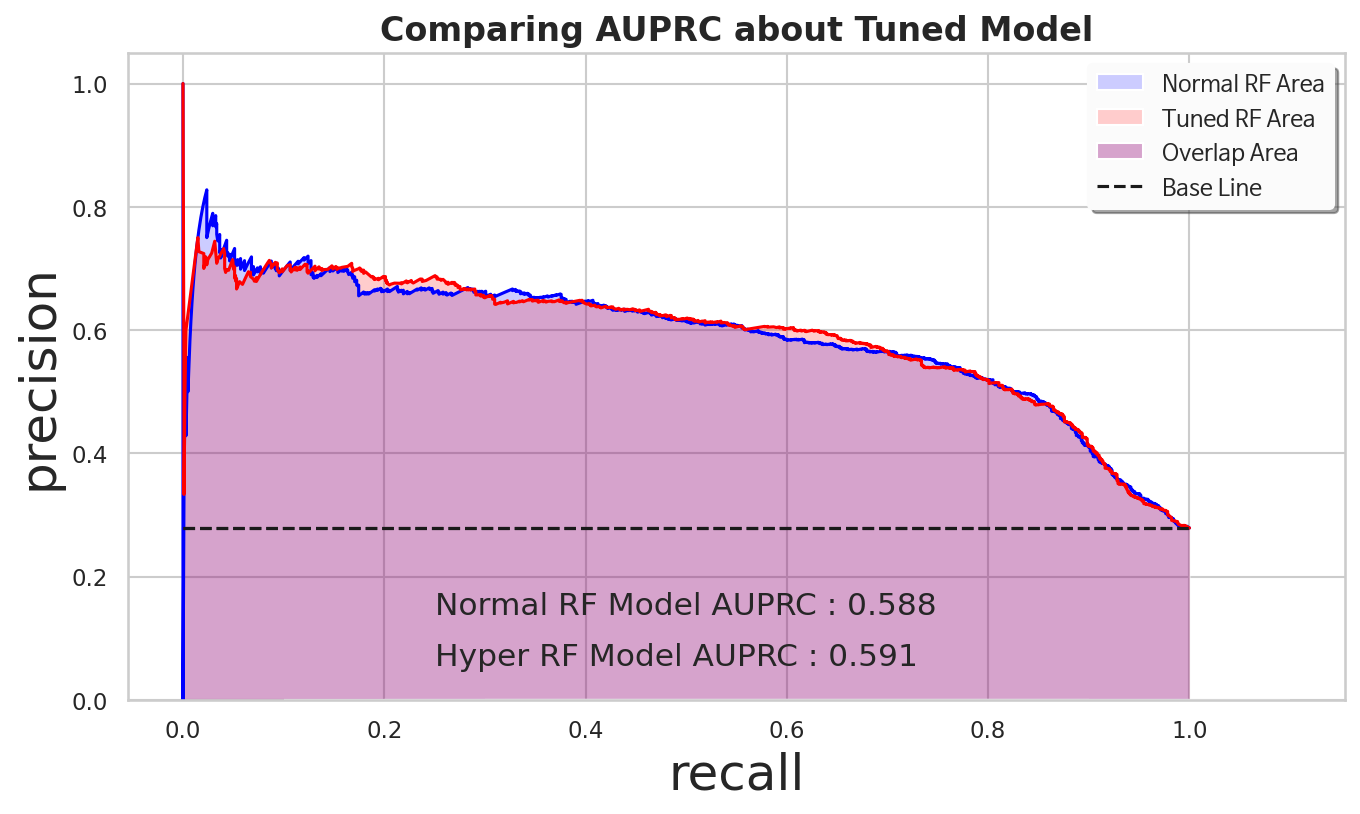

In [ ]:
fig = plt.figure(figsize=(22,40), dpi=150)
ax0 = fig.add_subplot(gs[0, 0])

SMOTE_RF_model_list = [RF_SMOTE_model, SMOTE_RF_hyp]
colors = ["blue", "red"]

for model, color in zip(SMOTE_RF_model_list, colors) :
  y_score = model.predict_proba(X_test)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_score)

  precision = list(precision)
  recall = list(recall)
  thresholds = list(thresholds)

  precision.reverse()
  recall.reverse()
  thresholds.reverse()

  sklearn_AUPRC = average_precision_score(y_test, y_score)

  ax0.plot(recall, precision, color = color)
  ax0.fill_between(recall, precision, 0, facecolor=color, alpha=0.2)
  ax0.set_xlabel("recall", fontsize = 24)
  ax0.set_ylabel("precision", fontsize = 24)

# AUPRC 필기
  if model == RF_SMOTE_model : 
    ax0.text(recall[-1]/4, precision[-1]/2, 'Normal RF Model AUPRC : ' + str(round(sklearn_AUPRC,3)), fontsize = 15)
  else :
    ax0.text(recall[-1]/4, precision[-1]/5, 'Hyper RF Model AUPRC : ' + str(round(sklearn_AUPRC,3)), fontsize = 15)

# Legend
  Normal_RF_area, = ax0.bar([0.5],[0],color='#CCCCFF')
  Hyper_RF_area, = ax0.bar([0.6],[0],color='#FFCCCC')
  overlap_area, = ax0.bar([0.7],[0],color='#D6A3CC')
  base_rate = y_test.mean()
  base_line, = ax0.plot([0,1],[base_rate,base_rate],'k--')
  handles, labels = ax0.get_legend_handles_labels()
  handles.extend([Normal_RF_area, Hyper_RF_area, overlap_area, base_line])
  labels.extend(["Normal RF Area", "Tuned RF Area", "Overlap Area", 'Base Line'])

  ax0.legend(handles=handles, labels=labels, facecolor=background_color, edgecolor=background_color,
            frameon=True, shadow=True, prop={'family':'NanumBarunGothic'})
  
# title
  ax0.set_title('Comparing AUPRC about Tuned Model', weight='bold', size=16)

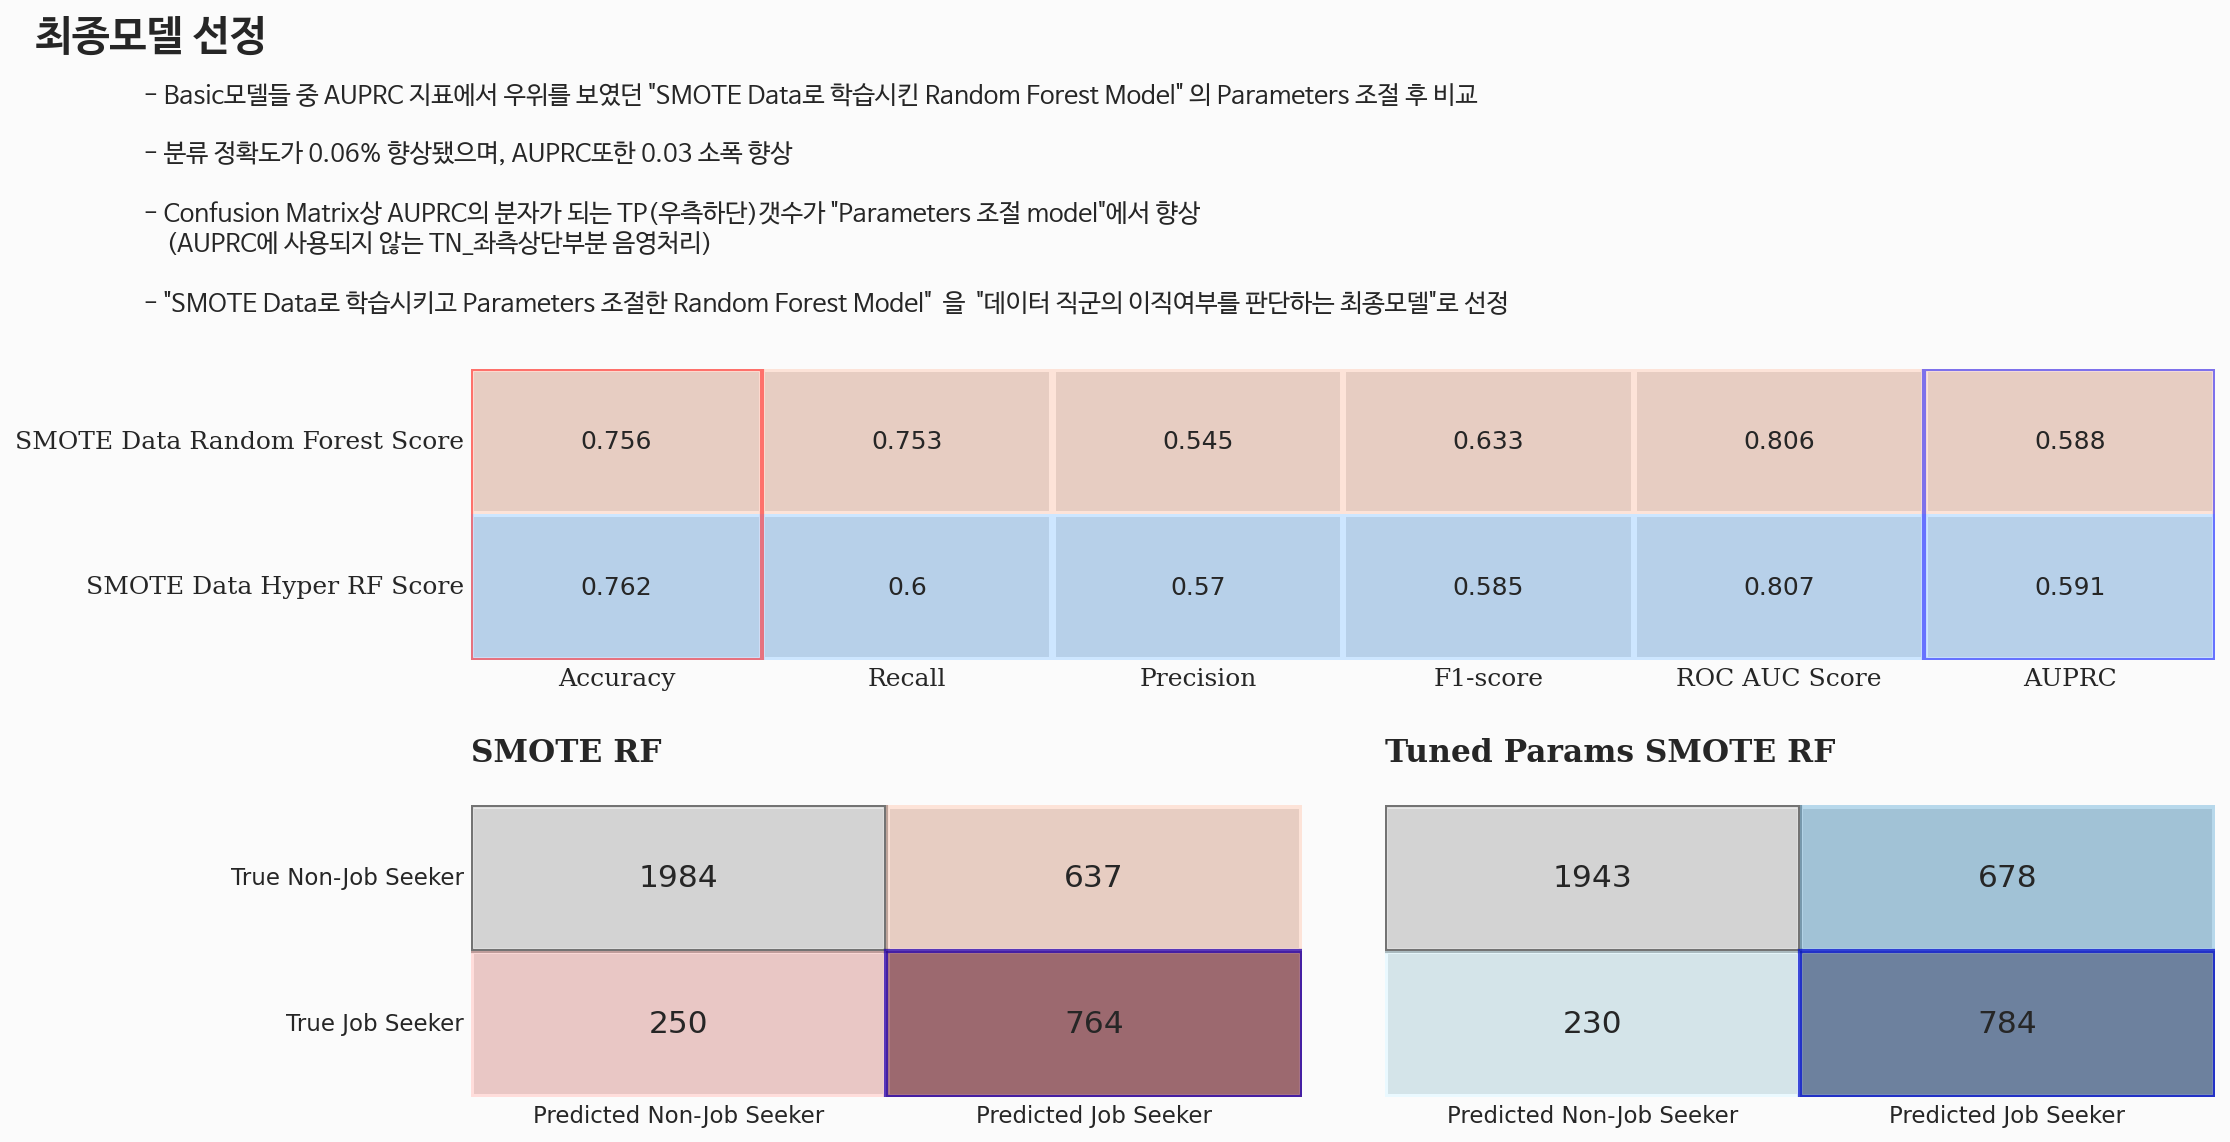

In [ ]:
# Plotting our results

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150) # create figure
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
# ax3 = fig.add_subplot(gs[2, 0])
# ax3.set_position([0.33, 0.4, 0.35, 0.135])

# Overall
df_models = round(pd.concat([SMOTE_rfc_df, SMOTE_RF_hyp_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".3", linewidths=2.5,cbar=False,ax=ax0)

ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

ax0.add_patch(Rectangle((0, 0), 6, 1, fill=True, color='#FCC8B3', edgecolor='white', linewidth=0, alpha=0.5))
ax0.add_patch(Rectangle((0, 1), 6, 1, fill=True, color='#9DCFFF', edgecolor='white', linewidth=0, alpha=0.5))

ax0.add_patch(Rectangle((0,0), 1, 2, fill=False, edgecolor='red', linewidth=2, alpha=0.5))
ax0.add_patch(Rectangle((5,0), 1, 2, fill=False, edgecolor='blue', linewidth=2, alpha=0.5))

ax0.text(-1.5,-2.2,'최종모델 선정',fontfamily='NanumBarunGothic',fontsize=20,fontweight='bold')
ax0.text(-1.3,-0.2,
         '''
         - Basic모델들 중 AUPRC 지표에서 우위를 보였던 "SMOTE Data로 학습시킨 Random Forest Model" 의 Parameters 조절 후 비교

         - 분류 정확도가 0.06% 향상됐으며, AUPRC또한 0.03 소폭 향상

         - Confusion Matrix상 AUPRC의 분자가 되는 TP(우측하단)갯수가 "Parameters 조절 model"에서 향상 
             (AUPRC에 사용되지 않는 TN_좌측상단부분 음영처리)

         - "SMOTE Data로 학습시키고 Parameters 조절한 Random Forest Model"  을  "데이터 직군의 이직여부를 판단하는 최종모델"로 선정
         '''
         ,fontfamily='NanumBarunGothic',fontsize=12
         )


# Random Forest(Encoding)
sns.heatmap(cm_rfc_smote, linewidths=2.5,yticklabels=['True Non-Job Seeker','True Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# XGBoost(Encoding)
sns.heatmap(cm_SMOTE_RF_hyp, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.set_xlabel("")
ax0.set_ylabel("")

ax1.text(0, -0.3, 'SMOTE RF',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Tuned Params SMOTE RF', fontsize=15, fontweight='bold', fontfamily='serif')

ax2.add_patch(Rectangle((0, 0), 1, 1, fill=True,color='#D3D3D3', edgecolor='white', lw=0,alpha=0.5))
ax2.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', linewidth=2, alpha=0.5))
ax2.add_patch(Rectangle((0, 1), 1, 1, fill=True,color='#D6F5FF', edgecolor='white', lw=0,alpha=0.5))
ax2.add_patch(Rectangle((1, 0), 1, 1, fill=True,color='#71B2D9', edgecolor='white', lw=0,alpha=0.5))
ax2.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#08306b', edgecolor='blue', linewidth=2, alpha=0.5))
ax2.add_patch(Rectangle((1, 1), 1, 1, fill=False, edgecolor='blue', linewidth=2, alpha=0.5))

ax1.add_patch(Rectangle((0, 0), 1, 1, fill=True,color='#D3D3D3', edgecolor='white', lw=0,alpha=0.5))
ax1.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', linewidth=2, alpha=0.5))
ax1.add_patch(Rectangle((0, 1), 1, 1, fill=True,color='#FFBCB8', edgecolor='white', lw=0,alpha=0.5))
ax1.add_patch(Rectangle((1, 0), 1, 1, fill=True,color='#FCC8B3', edgecolor='white', lw=0,alpha=0.5))
ax1.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#67000C', edgecolor='black', linewidth=2 ,alpha=0.5))
ax1.add_patch(Rectangle((1, 1), 1, 1, fill=False, edgecolor='blue', linewidth=2, alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,3):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,3):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)

for s in ["top","right","left"]:
    for i in range(0,3):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

#5. Analyze

---

In [ ]:
print(f"SMOTE train set : {y_train_smote.shape[0]}",
      f"\n63.1% : {y_train_smote.shape[0]*0.631}")

SMOTE train set : 20492 
63.1% : 12930.452


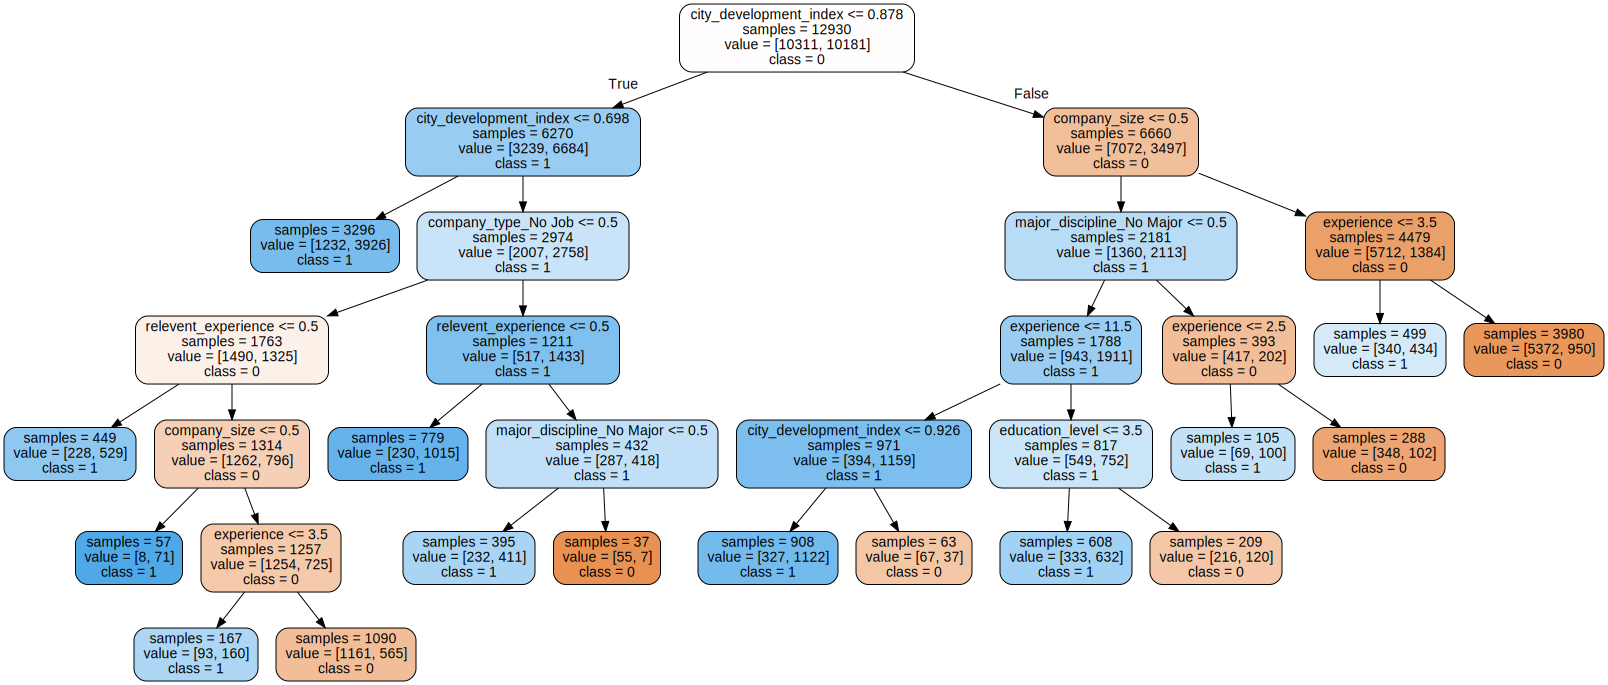

'hyp_RF.png'

In [ ]:
export_graphviz(SMOTE_RF_hyp.estimators_[0], out_file ="hyp_RF.dot", feature_names = X_test.columns, class_names = ['0','1'],
                max_depth = 11, impurity=False, rounded=True, filled=True)

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

with open("hyp_RF.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 이미지로 저장 
graphviz.Source(dot_graph).render('hyp_RF', format="png")

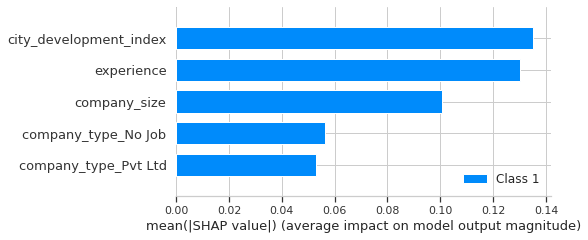

In [ ]:
explainer = shap.TreeExplainer(SMOTE_RF_hyp)
shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:], class_inds = [1], plot_type="bar", max_display = 5)
# 이직자들이 고려하는 특성은 도시개발지수, 경력, 회사규모(회사에 종사중인 사원 수) 이하 순

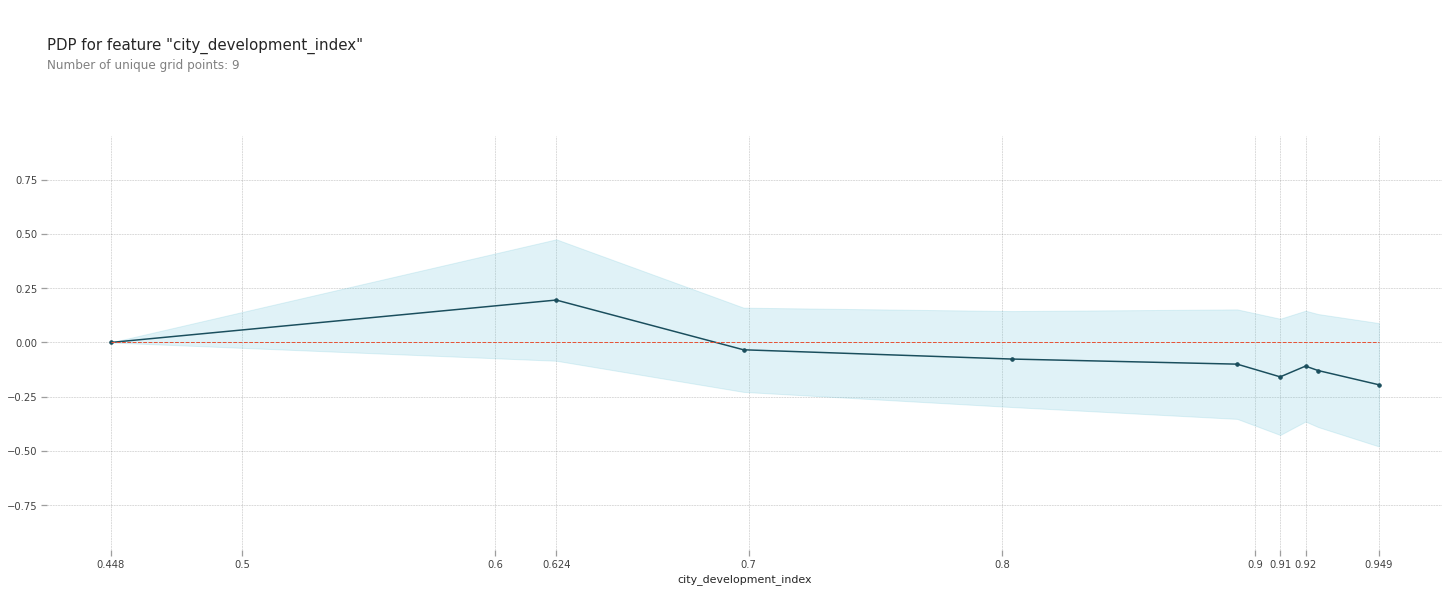

In [ ]:
features = X_test.columns
feature = 'city_development_index'
pdp_dist = pdp.pdp_isolate(model=SMOTE_RF_hyp, dataset=X_test, model_features=features, feature=feature)
fig, axes = pdp.pdp_plot(pdp_dist, feature,figsize=(25, 10));

# X_test.city_development_index.min() = 0.448 / X_test.city_development_index.max() = 0.949
plt.xticks([0.448,0.5,0.6,0.624,0.7,0.8,0.9,0.91,0.92,0.949], ['0.448','0.5','0.6','0.624','0.7','0.8','0.9','0.91','0.92','0.949']);

# 도시 개발지수가 0.624 미만인 곳에 종사하는 사람들의 이직희망율이 양수의 영역에서 그려지고 있으며, 이후 도시개발지수가 커질수록 이직 희망율이 감소하는것을 볼 수 있음.
# 또한, 도시개발지수가 0.624를 기점으로 이직희망율이 음의영역으로 향하는 것으로 보아, 해당 수치 내외에서 인프라가 크게 차이날 것 이라고 추측 해 볼 수 있음.
# 감소추세를 이어가는 도중 도시개발지수가 0.91~0.92구간에서 이직희망률이 간헐적 증가 후 재감소 하는것으로 보아, 해당수치 내외에서 인프라의 차이가 있을 것이라 추측 해 볼 수 있음.

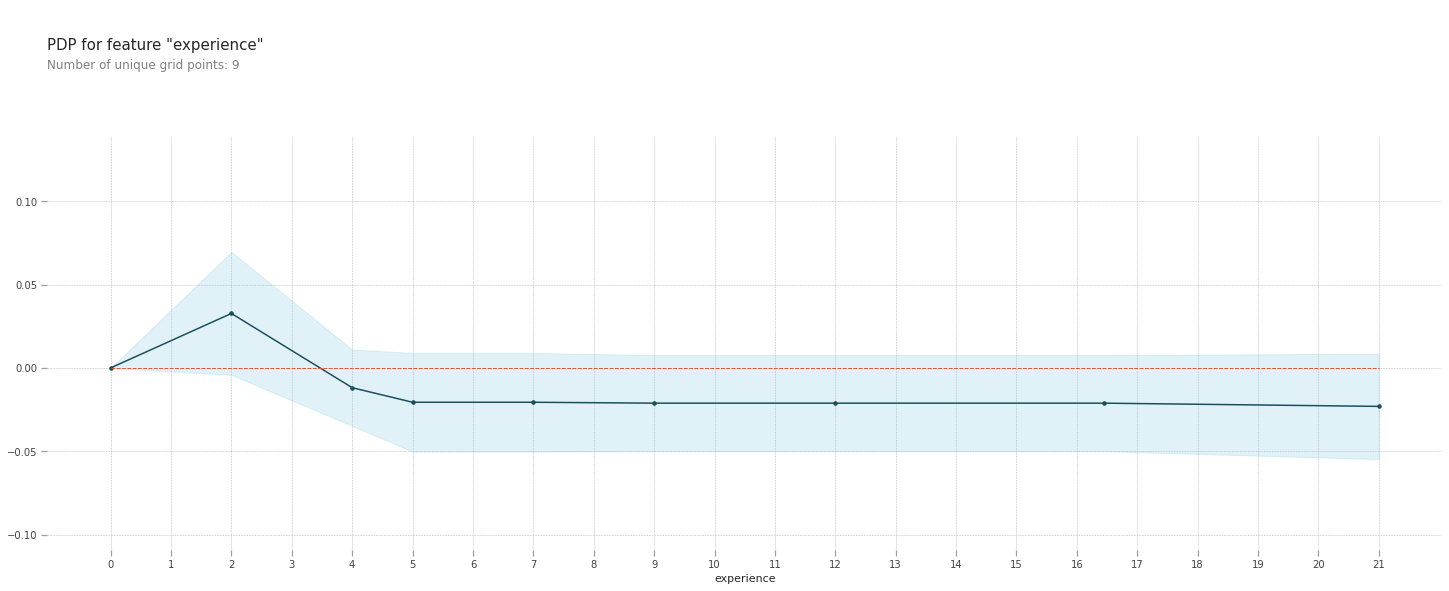

In [ ]:
features = X_test.columns
feature = 'experience'
pdp_dist = pdp.pdp_isolate(model=SMOTE_RF_hyp, dataset=X_test, model_features=features, feature=feature);
fig, axes = pdp.pdp_plot(pdp_dist, feature, feature,figsize=(25, 10));
plt.xticks(np.arange(0,22,1));
# 직종경험연차가 1년차부터 2년차까지 이직희망율 증가추세이며, 3년차까지 양수의 영역으로 비교적 높음을 관측, 이후 감소함을 알 수 있음.
# 이로인해 1-3년차의 주니어 분석가들은 초년 경험 후 이직하려 한다는 것을 추측할 수 있으며, 연차가 5년 이상일 경우부터 음수 영역에서 기울기가 일정해지는것으로 보아 한 직장에 정착하려 한다는 것을 추측할 수 있음.

In [ ]:
df_top2 = df_vis[['experience',	'city_development_index', 'target']]
df_top2.rename(columns = {'city_development_index':'CDI'},inplace=True)

In [ ]:
df_group = df_top2.groupby(["experience", 'CDI']).sum()["target"].reset_index()
df_group['percent(%)'] = df_group['target'] / df_vis.shape[0] * 100
fig = px.line_3d(df_group, x="experience", y="CDI", z="percent(%)")
fig.show()